<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/Flujo_de_Trabajo_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">**Flujo de trabajo de Machine Learning para Regresión en Python**</font>
## <font color="#6a1b9a">Asignatura: Inteligencia Artificial</font>
### <font color="green">Programa de Ingenieía de Sistemas</font>


La ingeniería de machine learning robusta no solo se basa en la selección de algoritmos potentes, sino también en la implementación de flujos de trabajo disciplinados, reproducibles y resistentes a errores. La base de dicho flujo de trabajo es el uso estratégico de herramientas que imponen consistencia procedimental y previenen errores de modelado comunes pero críticos.


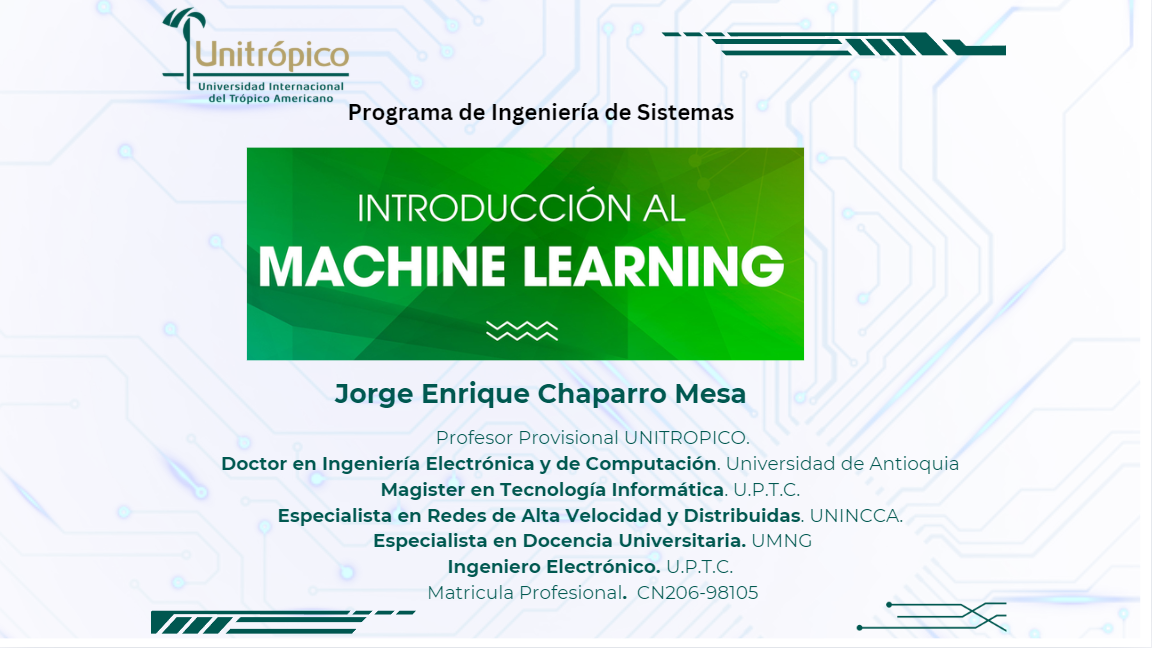

# **Ejercicio Completo de Arendizaje automático para Regresión**

Este cuaderno muestra de forma detallada los pasos para desarrollar modelos de regresión en aprendizaje automático. Se describe el flujo de trabajo general y se implementan distintos algoritmos de regresión sobre un conjunto de datos sintético con 20 variables predictoras y una variable respuesta continua.

El flujo de trabajo se basa en las etapas destacadas en el diagrama proporcionado: análisis del negocio, adquisición y preprocesamiento de datos, exploración y selección de características, división del conjunto de datos, entrenamiento y validación de modelos, ajuste de hiperparámetros, evaluación y despliegue.

Se trabaja todo el documento haciendo uso de laslibrerias de **scikit-learn**. Toda la informacion en detalle asi como el codigo utilizado en este Notebook se encuentra en el sitio oficial de **scikit-learn**  https://scikit-learn.org/stable/index.html

Parte de la informacion teórica de este Notebook ha sido tomada del Libro **Hands-on Machine Learning with Python** - Autores A
shwin Pajankar & Aditya Joshi
Tambien se usa informacion de apoyo de los siguientes sitios:

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-clase-onehotencoder

https://joanby.github.io/bookdown-mlaz/index.html

El proceso completo de entrenamiento en ML incluye tareas que van más allá de la ingesta de datos para obtener modelos de ML, el entrenamiento de modelos en instancias de procesamiento y la obtención de artefactos y resultados de los modelos. Debe evaluar todas las fases de antes, durante y después del entrenamiento para asegurarse de que su modelo está bien entrenado para cumplir la precisión deseada para sus objetivos.

El siguiente diagrama de flujo muestra una descripción general de alto nivel de sus acciones (en cuadros azules) y las funciones de SageMaker formación disponibles (en cuadros de color azul claro) a lo largo de la fase de formación del ciclo de vida del aprendizaje automático.

## **Flujo de trabajo general**

1. **Análisis del negocio**: definir el problema y los objetivos, identificar la variable objetivo y las variables que pueden influir en ella.
2. **Adquisición de datos**: obtener datos relevantes (bases de datos, archivos locales, APIs, sensores).
3. **Preprocesamiento de datos**: limpieza (imputación de valores faltantes, eliminación de duplicados), codificación de variables categóricas, normalización o estandarización.
4. **Exploración y análisis de datos**: visualización, estadísticas descriptivas e identificación de patrones y correlaciones.
5. **Selección de características**: eliminar características redundantes y aplicar métodos de selección.
6. **División de datos**: separar el conjunto en variables independientes (X) y dependiente (y); generar conjuntos de entrenamiento, validación y prueba.
7. **Entrenamiento del modelo**: ajustar diferentes algoritmos de aprendizaje automático.
8. **Validación y ajuste de hiperparámetros**: utilizar métricas de rendimiento (R², MSE, RMSE) y técnicas de búsqueda (grid search, random search) para optimizar parámetros.
9. **Evaluación del modelo**: evaluar el rendimiento en datos no vistos.
10. **Despliegue**: integrar el modelo en una aplicación o servicio (fuera del alcance de este cuaderno).

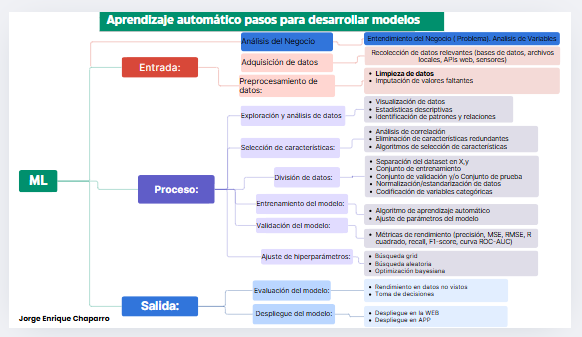

## <font color="#6a1b9a">**Datos Heterogéneos con sklearn**</font>

Los conjuntos de datos del mundo real rara vez son homogéneos. Típicamente contienen una mezcla de tipos de datos —numéricos, categóricos, ordinales, binarios— cada uno exigiendo una estrategia de preprocesamiento específica. Aplicar una única transformación, como la estandarización, a todas las columnas es a menudo incorrecto y puede dañar por completo el rendimiento del modelo. En este cuaderno se presenta un flujo de trabajo consistente con el desarrollo de Modelo predictivos con datos Heterogeneos.


## **Dataset de ejemplo**

Se generó un conjunto de datos sintético mediante la función `make_regression` de `scikit‑learn`. Este dataset consta de 1000 observaciones, 20 variables predictoras y una variable respuesta continua. Aunque los datos son artificiales, permiten ilustrar de manera realista la construcción de modelos de regresión.

Las variables se denominan `feature_0`, `feature_1`, …, `feature_19` y la variable respuesta se denomina `target`.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generar datos numéricos
X_numeric, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
columnas_num = [f"feature_{i}" for i in range(X_numeric.shape[1])]

df = pd.DataFrame(X_numeric, columns=columnas_num)
df['target'] = y

# Crear variable categórica a partir de feature_0
df['cat_feature_1'] = pd.cut(df['feature_0'], bins=3, labels=['bajo', 'medio', 'alto'])

# Crear variable categórica aleatoria
df['cat_feature_2'] = np.random.choice(['A', 'B', 'C'], size=df.shape[0])

# Crear variable categórica basada en cuartiles de feature_1
df['cat_feature_3'] = pd.qcut(df['feature_1'], q=4, labels=['Q1','Q2','Q3','Q4'])

# Mostrar algunas filas del dataset
print('Dimensiones del dataset con variables categóricas:', df.shape)
df.head()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   feature_0      1000 non-null   float64 
 1   feature_1      1000 non-null   float64 
 2   feature_2      1000 non-null   float64 
 3   feature_3      1000 non-null   float64 
 4   feature_4      1000 non-null   float64 
 5   feature_5      1000 non-null   float64 
 6   feature_6      1000 non-null   float64 
 7   feature_7      1000 non-null   float64 
 8   feature_8      1000 non-null   float64 
 9   feature_9      1000 non-null   float64 
 10  feature_10     1000 non-null   float64 
 11  feature_11     1000 non-null   float64 
 12  feature_12     1000 non-null   float64 
 13  feature_13     1000 non-null   float64 
 14  feature_14     1000 non-null   float64 
 15  feature_15     1000 non-null   float64 
 16  feature_16     1000 non-null   float64 
 17  feature_17     1000 non-null   flo

## **Preprocesamiento de Datos: Preparando la Matriz de Características**


### Manejo de Datos Faltantes: `sklearn.impute.SimpleImputer`

La gran mayoría de los estimadores de machine learning en ```scikit-learn```
no pueden procesar conjuntos de datos que contengan valores faltantes, típicicamente representados como ```numpy.nan``` . Por lo tanto, la imputación es un primer paso obligatorio. El ```SimpleImputer``` proporciona varias estrategias univariadas para esta tarea, donde cada columna se trata de forma independiente . Las estrategias principales incluyen:
*    **mean:** Reemplaza los valores faltantes con la media aritmética de los valores no faltantes en esa columna. Es eficaz para datos distribuidos normalmente pero es sensible a los valores atípicos .
*    **median:** Reemplaza los valores faltantes con la mediana. Como la mediana se ve menos afectada por valores extremos, esta estrategia es más robusta a los valores atípicos .
*    **most_frequent:** Reemplaza los valores faltantes con la moda, o el valor más común en la columna. Esta es la única estrategia que se puede utilizar para datos categóricos no numéricos .
*    **constant:** Reemplaza los valores faltantes con un valor fijo especificado por el parámetro fill_value. Esto es útil en casos donde el hecho de que un valor falte es en sí mismo una señal informativa .


La elección de la estrategia es una decisión de modelado que debe basarse en la distribución de los datos y en cualquier conocimiento del dominio sobre el mecanismo de la falta de datos. En este cuaderno se asume que esta parte ya se realizo en en la fase de Limieza de datos por lo tanto no se aplicara



In [ ]:
df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'target', 'cat_feature_1', 'cat_feature_2', 'cat_feature_3'],
      dtype='object')

## Identificar columnas categóricas y numéricas

In [ ]:
# Identificar columnas categóricas y numéricas
categorical_cols = ['cat_feature_1', 'cat_feature_2', 'cat_feature_3']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['target']]

## Explorar variables numéricas: estadísticas descriptivas

In [ ]:
# Explorar variables numéricas: estadísticas descriptivas
print("Estadísticas descriptivas de variables numéricas:")
display(df[numeric_cols].describe())

Estadísticas descriptivas de variables numéricas:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.076667,0.013539,0.032622,0.003376,-0.008915,0.015544,0.054075,0.004950,0.039394,0.011173,0.011749,-0.005270,-0.035079,-0.006954,-0.001288,0.031884,0.059952,0.027774,0.004833,-0.062712
std,1.009778,0.952066,1.014809,1.017669,0.997669,0.950731,1.013661,1.014536,1.023988,1.024155,1.030090,1.006971,1.003274,0.991788,0.987680,0.968005,1.038570,0.992521,1.010895,0.989027
min,-3.635200,-3.329504,-3.836656,-3.307900,-3.033989,-3.176704,-3.138515,-3.601085,-3.688365,-3.922400,-3.170426,-3.094289,-3.856375,-3.321115,-3.334893,-2.757854,-2.911804,-2.966753,-3.232565,-2.993707
25%,-0.760600,-0.587153,-0.609316,-0.662581,-0.682224,-0.617974,-0.649690,-0.706585,-0.661353,-0.696539,-0.683737,-0.663437,-0.703580,-0.679386,-0.679981,-0.595726,-0.629663,-0.643161,-0.651600,-0.767580
50%,-0.087050,-0.027852,0.043134,0.009513,-0.009753,0.021267,0.062630,-0.019474,0.033484,-0.009998,0.025255,0.011754,-0.071583,-0.003722,0.022868,0.021439,0.042206,0.034711,0.014585,-0.065310
75%,0.626192,0.597489,0.714922,0.668792,0.664804,0.652977,0.746288,0.708905,0.713115,0.727884,0.737680,0.689565,0.682633,0.626746,0.637962,0.686099,0.783025,0.699524,0.651299,0.603815
max,3.152057,2.985259,3.071337,3.377768,2.890643,2.783235,3.287761,3.137749,3.942331,3.076860,3.428910,3.377383,2.824220,3.285724,3.140423,3.852731,3.243093,4.479084,3.926238,2.969510


## Histogramas de variables numéricas

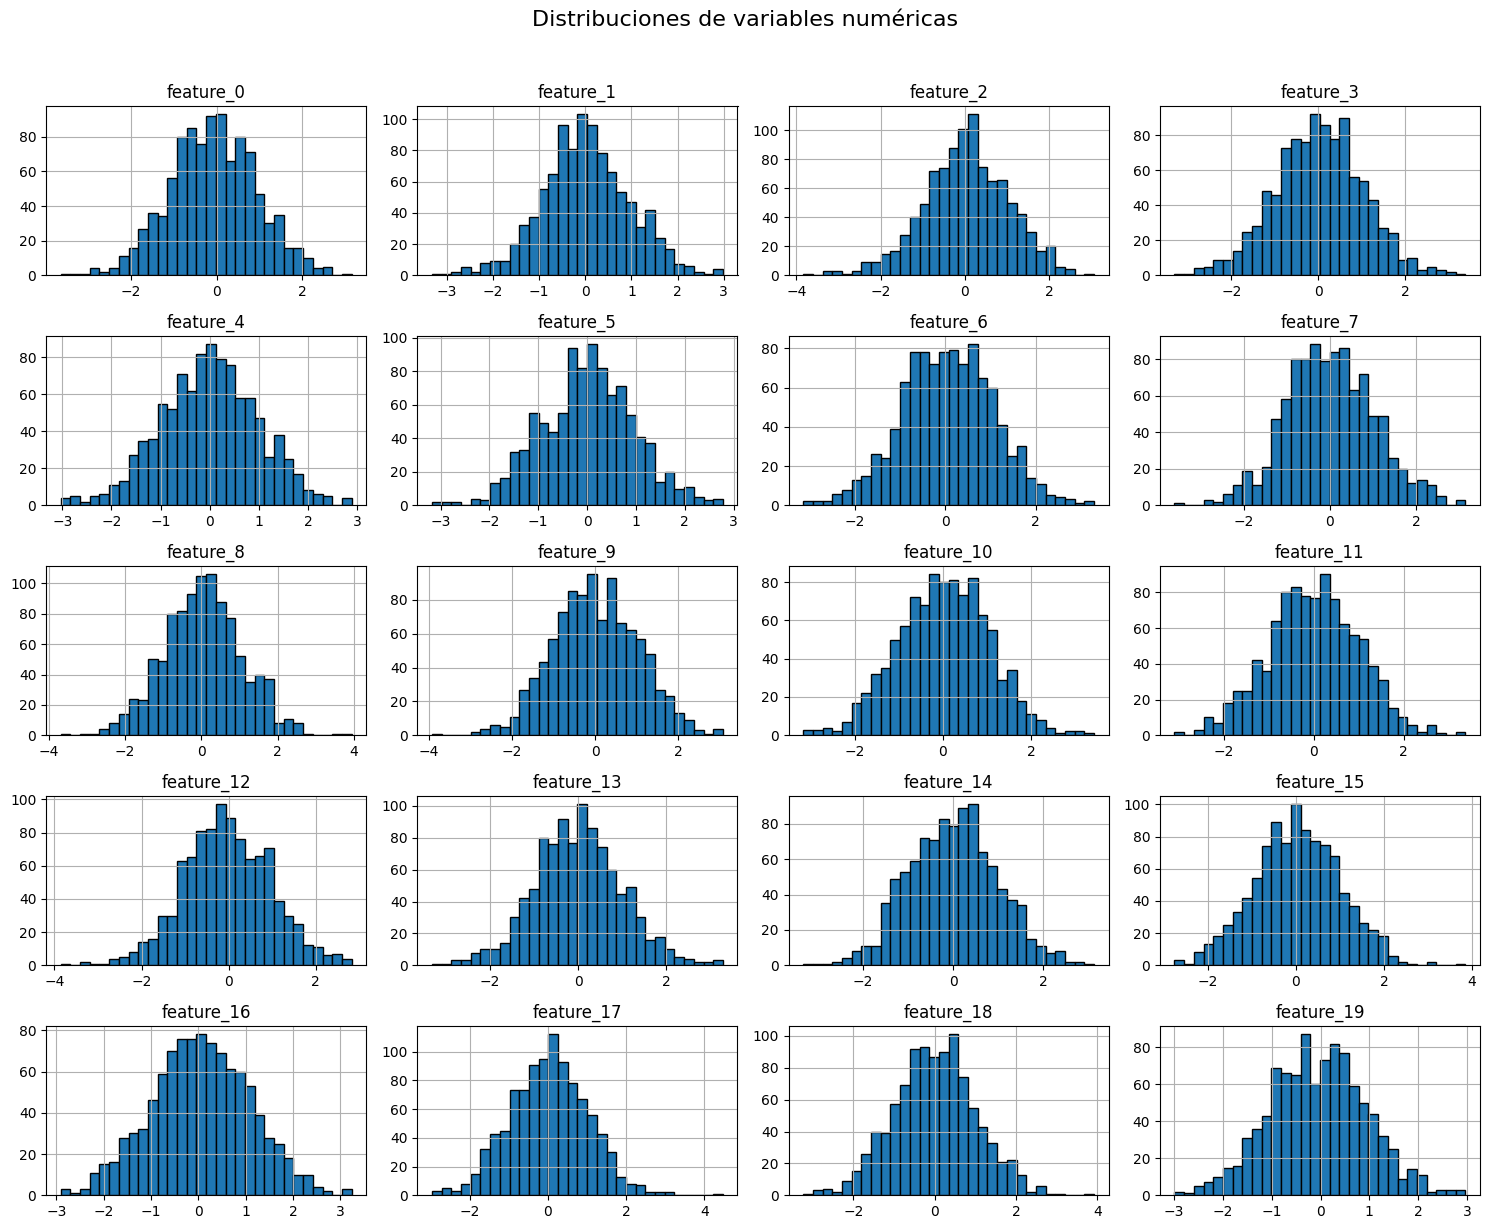

In [ ]:
# Histograma de cada variable numérica
import matplotlib.pyplot as plt
import seaborn as sns
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribuciones de variables numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Boxplots de algunas variables numéricas para detectar outliers (puedes ajustar el número de columnas)

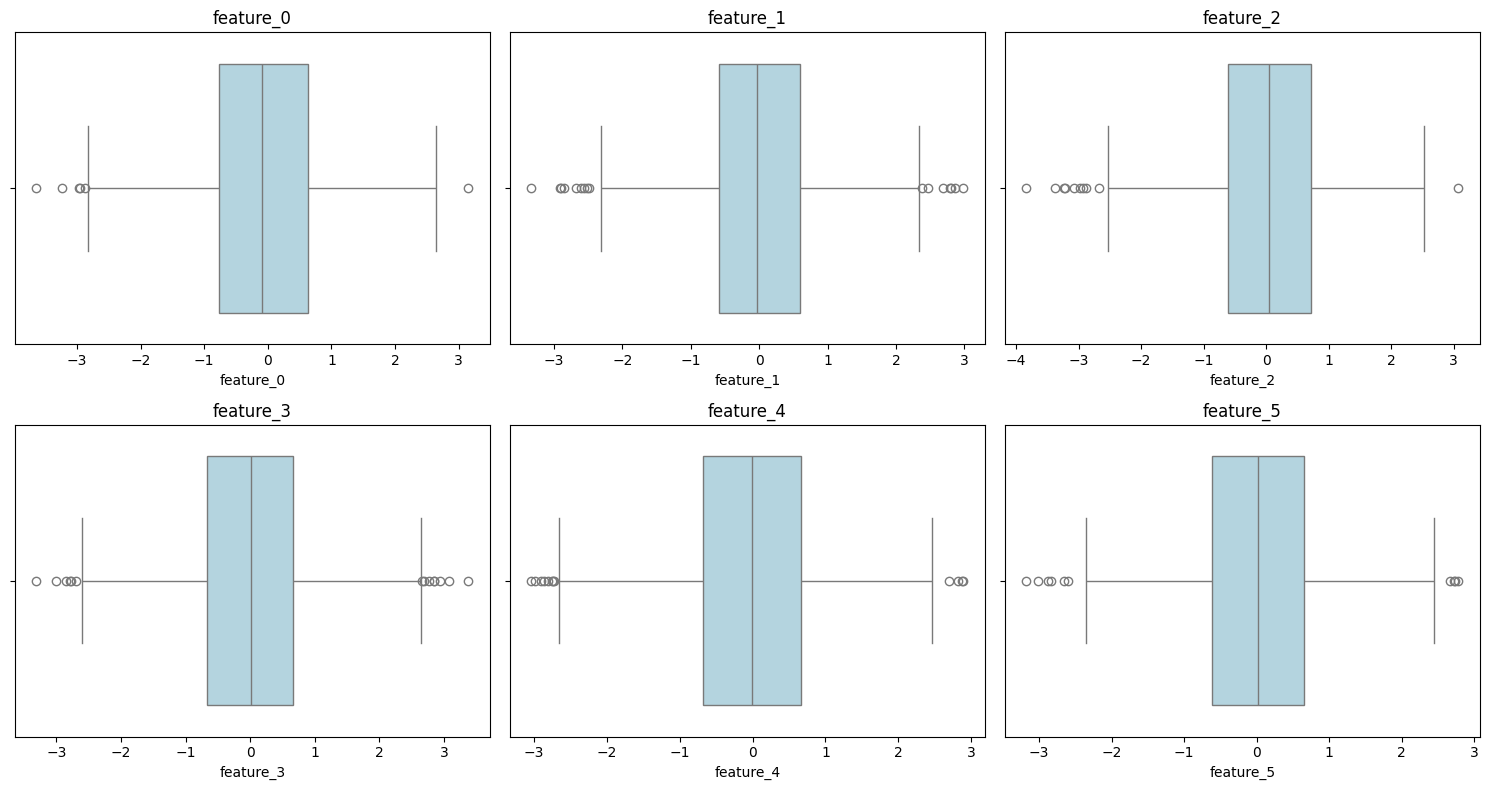

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6]):  # ajusta [:6] según cuántas quieras visualizar
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Matriz de correlación de variables numéricas

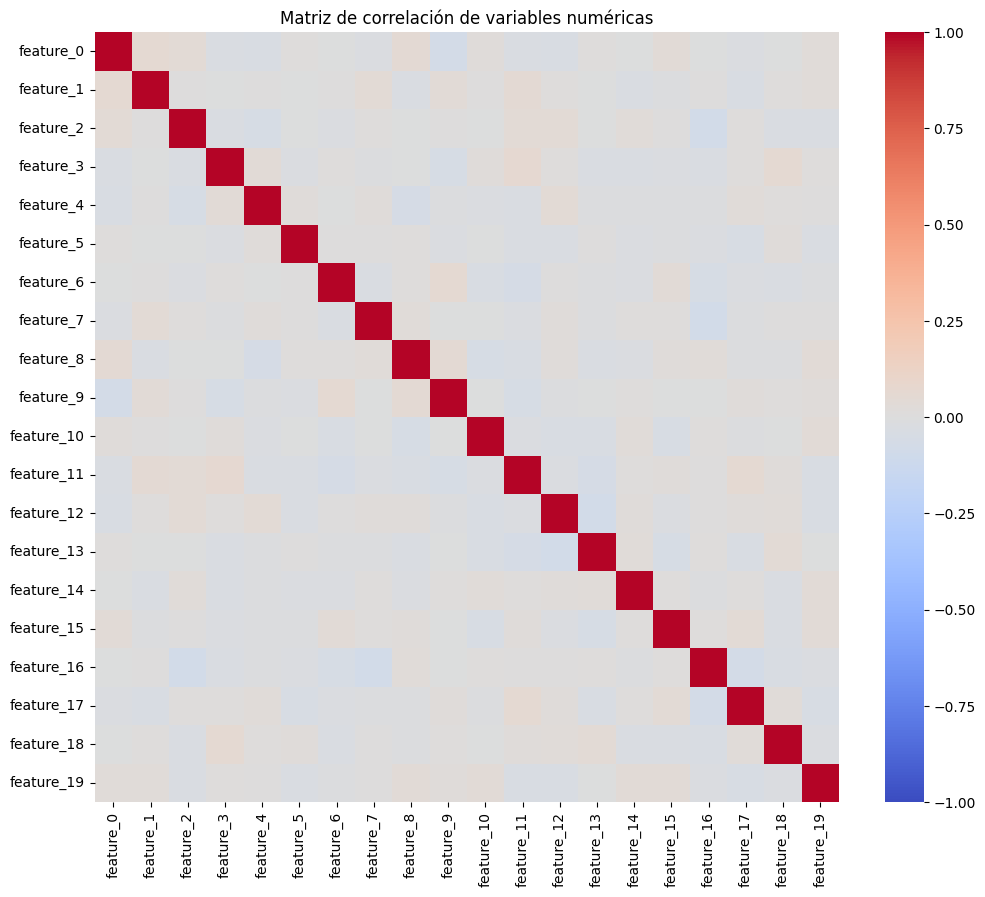

In [ ]:
# Matriz de correlación de variables numéricas
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de correlación de variables numéricas')
plt.show()

## **Distribución de las variables categóricas**

/tmp/ipython-input-1296805026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


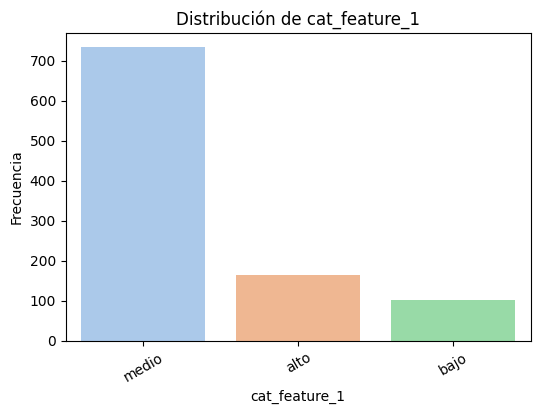

/tmp/ipython-input-1296805026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


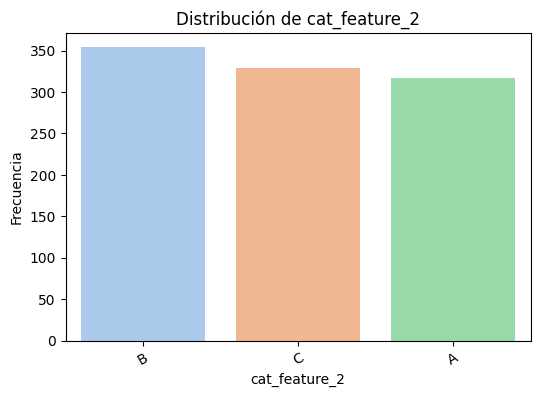

/tmp/ipython-input-1296805026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


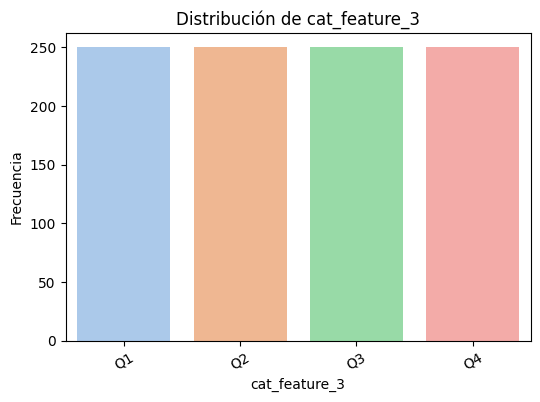

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=30)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{nombre_modelo} - R^2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    # Grafico Predicción vs Real
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(y_true)), y_true, color='red', marker='o', label='Valor real', s=15)
    plt.scatter(range(len(y_pred)), y_pred, color='blue', marker='o', label='Valor predicho', s=15)
    plt.title(f'Predicción vs Valor real ({nombre_modelo})')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()


## **Cálculo del factor de inflación de la varianza (VIF) para detectar multicolinealidad**

En el análisis de regresión, la multicolinealidad se produce cuando las variables independientes están correlacionadas entre sí. Esto dificulta la determinación de la influencia única de cada predictor sobre la variable dependiente. Como resultado, tienes errores estándar inflados, lo que a su vez afecta a la significación de los coeficientes.

El factor de inflación de la varianza (VIF) es una gran herramienta para detectar la multicolinealidad, ya que ofrece información que va más allá de las simples correlaciones por pares.

Desarrollado por el estadístico Cuthbert Daniel, el VIF es una herramienta de diagnóstico muy utilizada en el análisis de regresión para detectar la multicolinealidad, que se sabe que afecta a la estabilidad e interpretabilidad de los coeficientes de regresión. Más técnicamente, el VIF funciona cuantificando cuánto se infla la varianza de un coeficiente de regresión debido a las correlaciones entre los predictores.

Todo esto es importante porque estas correlaciones dificultan el aislamiento del efecto único de cada predictor sobre la variable objetivo, lo que conduce a estimaciones del modelo menos fiables. También debo decir que, para contar realmente la historia correcta, el VIF siempre se calcula para cada predictor de un modelo.

**Interpretación de los valores VIF**

Cómo interpretar los valores VIF para comprender el nivel de multicolinealidad:

**VIF = 1:** Esto indica que no hay multicolinealidad. El predictor no está correlacionado con otros predictores, por lo que no infla el error típico ni afecta a la estabilidad del modelo.

**VIF entre 1 y 5:** Esto sugiere una multicolinealidad moderada. Existe cierta correlación con otros predictores, pero no suele ser grave. Sin embargo, merece la pena vigilar estos predictores para ver si la multicolinealidad se convierte en un problema, sobre todo si otros valores VIF son altos.

**VIF > 5:** Existe una alta multicolinealidad. El error típico del predictor puede estar notablemente inflado, lo que puede hacer que su coeficiente sea menos fiable. Considera la posibilidad de tomar medidas para reducir la multicolinealidad, como eliminar o combinar los predictores correlacionados.

**VIF > 10:** Esto indica una multicolinealidad grave. El error típico del predictor está muy inflado y la estimación de su coeficiente es probablemente inestable. Suelen ser necesarias acciones correctoras, como eliminar el predictor o utilizar técnicas de regularización.  https://www.datacamp.com/es/tutorial/variance-inflation-factor

In [ ]:
# Cálculo del factor de inflación de la varianza (VIF) para detectar multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_num = df[numeric_cols].values
vif_data = pd.DataFrame({
    'feature': numeric_cols,
    'VIF': [variance_inflation_factor(X_num, i) for i in range(X_num.shape[1])]
})
print("VIF por variable numérica:")
display(vif_data.sort_values(by='VIF', ascending=False))

VIF por variable numérica:


,feature,VIF
11,feature_11,1.029138
16,feature_16,1.026992
9,feature_9,1.022565
0,feature_0,1.021955
13,feature_13,1.021233
17,feature_17,1.020796
12,feature_12,1.019735
8,feature_8,1.019085
2,feature_2,1.018465
3,feature_3,1.017235


### **Pairplot de un subconjunto de variables numéricas**

Un pairplot es una herramienta gráfica que muestra simultáneamente las distribuciones univariadas de cada variable y las relaciones bivariadas entre pares de variables. Al seleccionar un subconjunto de variables numéricas y generar un pairplot:

En la diagonal se visualizan las distribuciones individuales (histogramas o densidades) de cada variable, lo que permite evaluar su forma y detectar asimetrías u outliers.

Fuera de la diagonal se dibujan gráficos de dispersión para cada par de variables, que ayudan a identificar patrones de relación, tendencias lineales o no lineales y posibles correlaciones.

Esta visualización es especialmente útil como análisis exploratorio temprano, porque facilita comprender cómo se comportan las variables entre sí y si existen dependencias que puedan influir en el modelado. Para datasets con muchas variables, se suele seleccionar un subconjunto representativo para evitar una visualización excesivamente cargada.

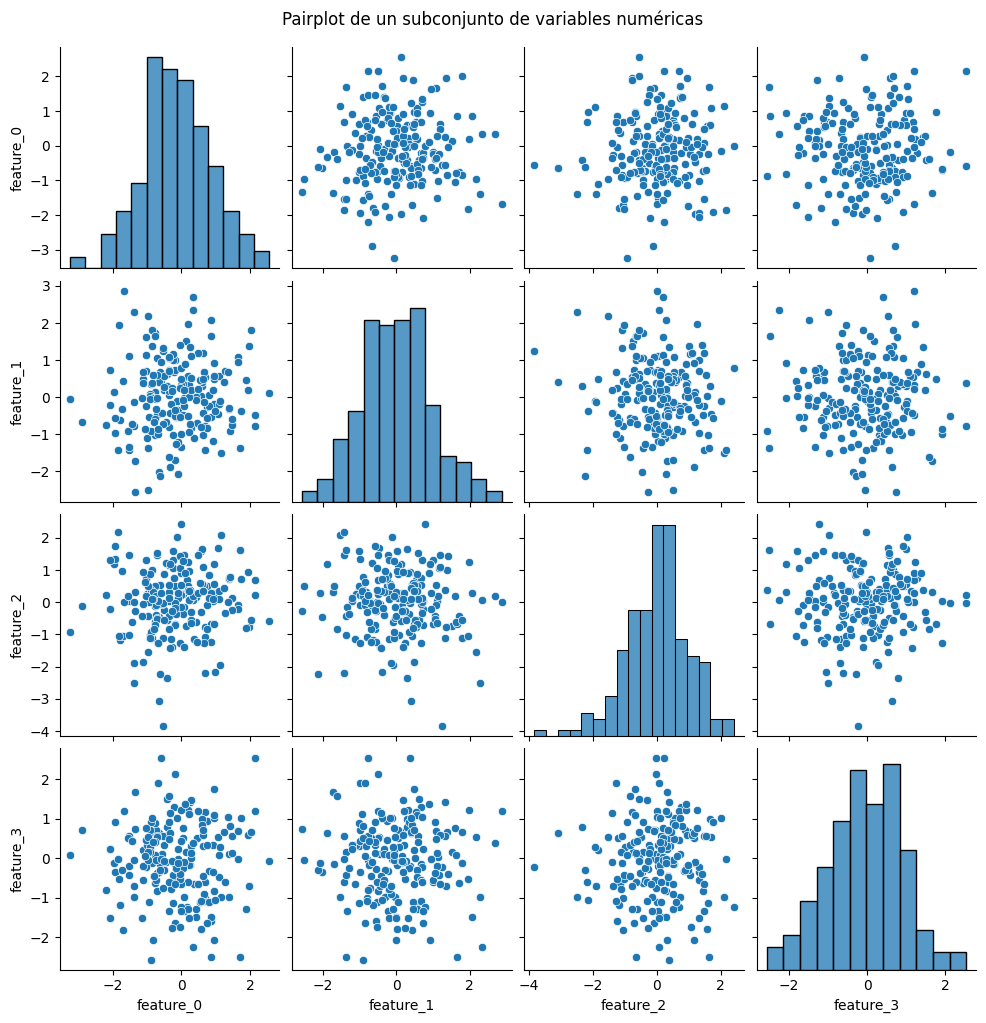

In [ ]:
# Pairplot de un subconjunto de variables numéricas
# Muestra relaciones bivariadas y distribuciones

subset_cols = numeric_cols[:4]  # selecciona las 4 primeras variables o las que consideres relevantes
sns.pairplot(df[subset_cols].sample(200), diag_kind='hist')
plt.suptitle('Pairplot de un subconjunto de variables numéricas', y=1.02)
plt.show()


# **Separar variables independientes y dependiente**

In [ ]:
# Separar variables independientes y dependiente
X = df.drop('target', axis=1)
y = df['target']


### **Calcular la correlación de cada predictor numérico con la variable respuesta**

En Machine Learning, calcular la correlación de cada predictor numérico con la variable respuesta y cumple varios objetivos clave durante la etapa de análisis exploratorio y selección de características:

**1. Identificar relaciones lineales directas**

*   La correlación de Pearson mide la intensidad y dirección de la relación lineal entre dos variables.

*   Un valor cercano a 1 indica una fuerte correlación positiva (cuando x sube, y también).

*   Un valor cercano a -1 indica una fuerte correlación negativa (cuando x sube, y baja).

*   
Valores cercanos a 0 indican poca o ninguna relación lineal.



En modelos lineales (como Regresión Lineal, Ridge, Lasso), esta información ayuda a priorizar predictores que pueden aportar más capacidad explicativa.

**2. Reducir dimensionalidad eliminando variables poco útiles**



*   Si una variable tiene correlación muy baja con la respuesta, probablemente aporte poco valor predictivo y se puede considerar eliminarla para simplificar el modelo.
*   Esto ayuda a reducir el ruido y mejorar la interpretabilidad.

3. Evitar multicolinealidad en modelos sensibles

Aunque la correlación con la respuesta es el foco, este análisis suele ir acompañado de la revisión de correlación entre predictores para evitar multicolinealidad, que puede distorsionar los coeficientes en modelos lineales.

**4. Guiar la ingeniería de características**

*   Si encontramos que un predictor no tiene relación lineal significativa pero sí no lineal, podríamos aplicar transformaciones (log, polinómicas, etc.).

*   Esto permite capturar relaciones complejas en modelos que lo requieran.

**5. Priorización para modelos explicativos**

*   En problemas donde interesa interpretar el modelo (por ejemplo, en estudios científicos o financieros), los predictores con mayor correlación con la respuesta son candidatos iniciales para un análisis más profundo.



Correlación de cada variable predictora con la variable respuesta:
feature_1     0.502815
feature_17    0.441584
feature_4     0.433081
feature_0     0.421351
feature_6     0.338613
feature_11    0.213264
feature_15    0.167712
feature_10    0.072942
feature_2     0.033265
feature_3     0.026160
feature_18    0.009545
feature_12    0.006777
feature_7     0.004368
feature_19    0.002767
feature_9     0.000532
feature_5    -0.010584
feature_14   -0.010709
feature_13   -0.025394
feature_8    -0.031365
feature_16   -0.053354
Name: target, dtype: float64


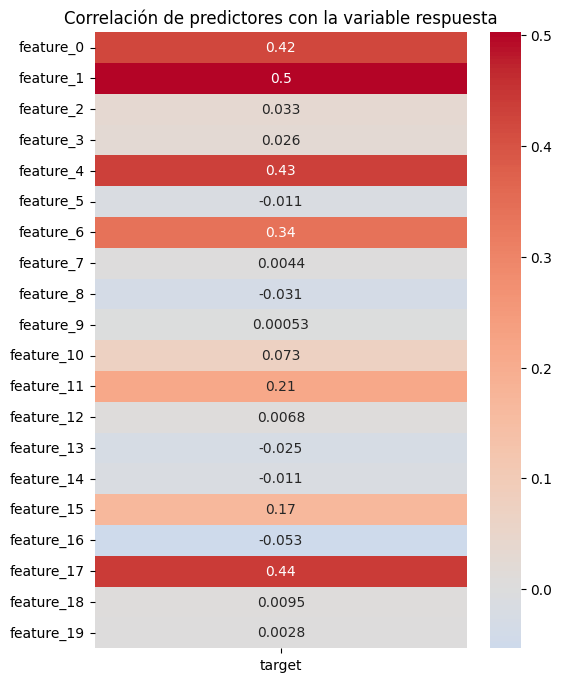

In [ ]:
X_num = X.select_dtypes(include=['number'])

correlaciones = pd.concat([X_num, y], axis=1).corr(method='pearson')['target'].drop('target')
print("Correlación de cada variable predictora con la variable respuesta:")
print(correlaciones.sort_values(ascending=False))

# Visualizar correlaciones con un mapa de calor
plt.figure(figsize=(6, len(correlaciones) * 0.4))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de predictores con la variable respuesta')
plt.show()

/tmp/ipython-input-1780000053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones_ordenadas, y=correlaciones_ordenadas.index, palette='coolwarm')


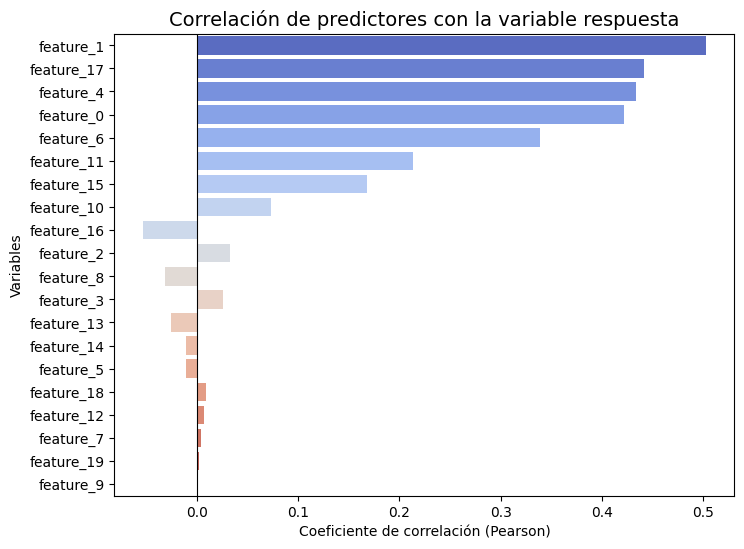

In [ ]:
# Ordenar correlaciones por valor absoluto
correlaciones_ordenadas = correlaciones.reindex(correlaciones.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,6))
sns.barplot(x=correlaciones_ordenadas, y=correlaciones_ordenadas.index, palette='coolwarm')
plt.title('Correlación de predictores con la variable respuesta', fontsize=14)
plt.xlabel('Coeficiente de correlación (Pearson)')
plt.ylabel('Variables')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

## Identificar columnas numéricas y categóricas

In [ ]:
# Identificar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns


# **Dividir en conjuntos de entrenamiento y prueba**

En *Machine Learning*, la división de un conjunto de datos en **entrenamiento** y **prueba** es un paso fundamental para evaluar la capacidad de generalización de un modelo.

## Definición
Según Géron (2022) en *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*:

> "Separar los datos en un conjunto de entrenamiento y uno de prueba permite que el modelo se entrene en un subconjunto y se evalúe en otro independiente, lo que proporciona una estimación imparcial del error de generalización."

## Finalidad
- **Entrenamiento**: El modelo aprende patrones y relaciones a partir de un subconjunto de datos.
- **Prueba**: Se reserva un subconjunto independiente para medir el rendimiento en datos no vistos.

Bishop (2006) en *Pattern Recognition and Machine Learning* menciona:

> "La evaluación del rendimiento debe realizarse sobre datos no utilizados en el ajuste de los parámetros, para obtener una estimación no sesgada del error de generalización."

## Prevención del sobreajuste
Goodfellow, Bengio y Courville (2016) en *Deep Learning* señalan:

> "Si se evalúa el modelo con los mismos datos usados para el entrenamiento, la estimación del rendimiento puede ser demasiado optimista debido al sobreajuste."

## Ejemplo en Python
```python
from sklearn.model_selection import train_test_split

# División 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



## <font color="#6a1b9a">**Escalado de Características para Datos Numéricos: `sklearn.preprocessing.StandardScaler`**</font>


Muchos algoritmos potentes, particularmente aquellos que dependen de la optimización por descenso de gradiente o cálculos de distancia, son sensibles a la escala de las características de entrada . Por ejemplo, en modelos lineales regularizados o Máquinas de Vectores de Soporte, una característica con una varianza que es órdenes de magnitud mayor que otras puede dominar la función objetivo, impidiendo que el modelo aprenda eficazmente de las otras características .


### <font color="green">**StandardScaler**</font>

**`StandardScaler`** aborda esto estandarizando las características, lo que implica eliminar la media y escalar a la varianza unitaria.

### **¿Qué es la estandarización?**

La estandarización es un método de preparación de datos que implica ajustar la entrada (características) centrándolas primero (restando la media de cada punto de datos) y luego dividiéndolas por la desviación estándar, lo que da como resultado que los datos tengan una media de 0 y una desviación estándar de 1.

La fórmula de estandarización se puede escribir de la siguiente manera:

valor_estandarizado = (valor_de_entrada – media) / desviación_estándar
Supongamos que tiene una media de 10,4 y una desviación estándar de 4. Para estandarizar el valor de 15,9 , introduzca los valores dados en la ecuación de la siguiente manera:

**valor_estandarizado = (15.9 – 10.4) / 4**
**valor_estandarizado = ( 5.5 ) / 4**
**valor_estandarizado = 1.37**
**StandardScaler** destaca como una herramienta ampliamente utilizada para implementar la estandarización de datos.

**StandardScaler**  proporcionada por Scikit Learn aplica la estandarización en la variable de entrada (características), asegurándose de que tengan una media de aproximadamente 0 y una desviación estándar de aproximadamente 1 .

Ajusta los datos para tener una distribución estandarizada, haciéndolos adecuados para el modelado y garantizando que ninguna característica individual influya desproporcionadamente en el algoritmo debido a diferencias en la escala.

## <font color="#6a1b9a">**Codificación de Datos Categóricos: `sklearn.preprocessing.OneHotEncoder``**</font>

Los modelos de machine learning son funciones matemáticas que operan con datos numéricos. Por lo tanto, las características categóricas, como nombres de ciudades o tipos de productos, deben convertirse a un formato numérico . Un enfoque ingenuo de asignar etiquetas enteras (p. ej., {'<font color="red">  rojo </font>': 0, '<font color="green"> verde</font>': 1, '<font color="blue">  azul </font>': 2}) es defectuoso porque impone una relación ordinal artificial que no existe en los datos (p. ej., implicando que azul > verde).

El **`sklearn.preprocessing`**  proporciona varias funciones de utilidad comunes y clases de transformadores para cambiar los vectores de características sin procesar en una representación que sea más adecuada para los estimadores posteriores.

En general, muchos algoritmos de aprendizaje, como los modelos lineales, se benefician de la estandarización del conjunto de datos (véase " Importancia del escalado de características" ). Si existen valores atípicos en el conjunto, los escaladores robustos u otros transformadores pueden ser más apropiados. El comportamiento de los diferentes escaladores, transformadores y normalizadores en un conjunto de datos con valores atípicos marginales se describe en " Comparar el efecto de diferentes escaladores en datos con valores atípicos".
https://scikit-learn.org/stable/modules/preprocessing.html

## **OneHotEncoder**

**OneHotEncoder**.  La codificación one-hot es un método de conversión de variables categóricas en un formato que se puede proporcionar a los algoritmos de aprendizaje automático para mejorar la predicción. Consiste en crear nuevas columnas binarias para cada categoría única de una característica. Cada columna representa una categoría única, y un valor de 1 o 0 indica la presencia o ausencia de esa categoría.

Veamos un ejemplo para ilustrar cómo funciona la codificación de un solo golpe. Supongamos que tenemos un conjunto de datos con una única característica categórica, Color, que puede tomar tres valores: Red, Green, y Blue. Utilizando la codificación de un solo golpe, podemos transformar esta característica de la siguiente manera:

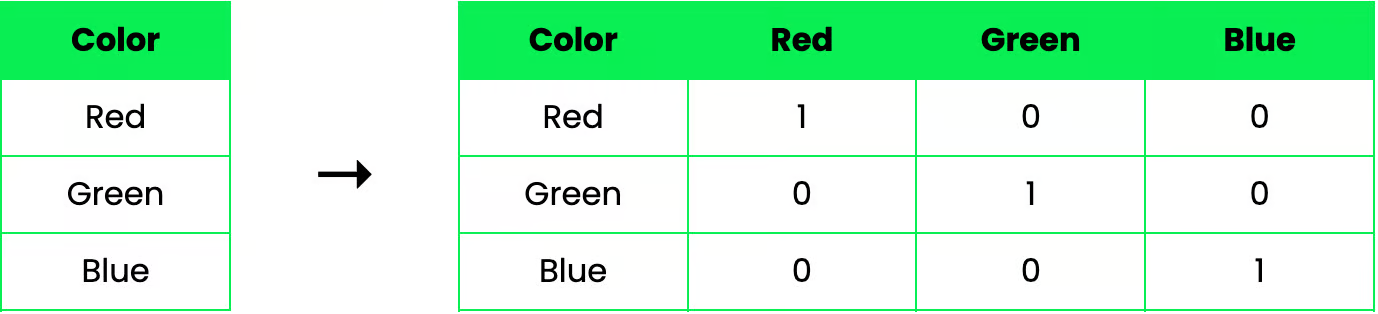





 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

 Codificación de Datos Categóricos: sklearn.preprocessing.OneHotEncoder


**¿Por qué utilizar la codificación One-Hot?**

La codificación One-Hot es una técnica esencial en el preprocesamiento de datos por varias razones. Transforma los datos categóricos en un formato que los modelos de aprendizaje automático puedan comprender y utilizar fácilmente. Esta transformación permite tratar cada categoría de forma independiente, sin implicar falsas relaciones entre ellas.

Además, muchas bibliotecas de procesamiento de datos y aprendizaje automático admiten la codificación de un solo golpe. Se adapta sin problemas al flujo de trabajo de preprocesamiento de datos, facilitando la preparación de conjuntos de datos para diversos algoritmos de aprendizaje automático.

## <font color="red">**Pipeline de ML Reproducibl**e</font>

La ingeniería de machine learning robusta no solo se basa en la selección de algoritmos potentes, sino también en la implementación de flujos de trabajo disciplinados, reproducibles y resistentes a errores. La base de dicho flujo de trabajo es el uso estratégico de herramientas que imponen consistencia procedimental y previenen errores de modelado comunes pero críticos. Dentro del ecosistema de `scikit-learn`, los objetos `Pipeline` y `ColumnTransformer` sirven como las piedras angulares arquitectónicas para construir tales sistemas. No son meras conveniencias para reducir código; son componentes esenciales para garantizar la integridad del modelo desde la experimentación inicial hasta el despliegue final.

En s`cikit-learn`, un Pipeline es una herramienta que permite encadenar, en un único objeto, todo el flujo de preprocesamiento y modelado.
La idea es que cada paso se ejecute en orden, y que cuando llames a .fit() o .predict() se apliquen todos los pasos previos automáticamente.

### **¿Qué problema resuelve?**

*  Evita fugas de datos (data leakage) porque asegura que el ajuste de escaladores, codificadores, etc. se haga solo con los datos de entrenamiento.

*  Hace que el código sea más limpio y reproducible.

*  Permite que el mismo flujo funcione igual para entrenamiento, validación y predicción de nuevos datos.

*  Facilita la validación cruzada (cross_val_score, GridSearchCV) sin que tengas que repetir el preprocesamiento manualmente.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

In [ ]:
X_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,cat_feature_1,cat_feature_2,cat_feature_3
29,-0.981326,0.516644,0.029431,0.029191,-0.079908,0.697974,0.107208,-0.355974,-0.164242,1.888437,...,0.626435,0.697587,-1.623383,0.452068,-1.404817,-1.302845,-0.836092,medio,C,Q3
535,-0.626717,-1.379618,-0.971657,-0.163067,0.516178,-0.744903,0.953125,-0.881875,0.754291,0.800410,...,0.725096,1.188913,0.431923,-0.026521,0.862393,1.070150,0.708304,medio,C,Q1
695,-2.876032,-0.667223,-0.116764,0.713735,0.158392,0.327970,0.715866,-1.033029,-0.384582,1.085189,...,0.642292,-0.881141,-0.328537,-0.742746,-0.728529,0.659068,-1.005713,bajo,A,Q1
557,0.708109,-0.152470,0.133541,0.267392,0.507991,0.321698,-0.785989,-0.290275,2.493000,0.388579,...,-1.836205,-0.006071,-2.152891,0.919076,0.956702,-0.098890,0.838491,medio,C,Q2
836,0.285035,-0.079396,0.945497,-0.911593,0.785993,0.990061,0.898727,0.074274,0.313242,1.959684,...,-0.135601,-1.042928,-0.523759,-0.042856,-0.306395,0.434068,0.369052,medio,A,Q2


In [ ]:
# === 5) Generar datasets procesados (solo si quieres usarlos explícitamente) ===
X_train_processed = preprocessor.fit_transform(X_train)  # fit SOLO con train
X_test_processed  = preprocessor.transform(X_test)

print("Formas:", X_train_processed.shape, X_test_processed.shape)


Formas: (800, 30) (200, 30)


In [ ]:
import scipy.sparse as sp
# (Opcional) ver X_train_processed como DataFrame para la clase
all_feat_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed.toarray() if sp.issparse(X_train_processed) else X_train_processed,
                          columns=all_feat_names, index=X_train.index)
display(X_train_df.head())

,num__feature_0,num__feature_1,num__feature_2,num__feature_3,num__feature_4,num__feature_5,num__feature_6,num__feature_7,num__feature_8,num__feature_9,...,cat__cat_feature_1_alto,cat__cat_feature_1_bajo,cat__cat_feature_1_medio,cat__cat_feature_2_A,cat__cat_feature_2_B,cat__cat_feature_2_C,cat__cat_feature_3_Q1,cat__cat_feature_3_Q2,cat__cat_feature_3_Q3,cat__cat_feature_3_Q4
29,-0.915625,0.534085,0.019756,0.029650,-0.059600,0.732605,0.051150,-0.329293,-0.191076,1.823635,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
535,-0.559700,-1.472718,-0.962473,-0.157214,0.540548,-0.799715,0.884418,-0.845632,0.702742,0.754977,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
695,-2.817364,-0.718795,-0.123685,0.694990,0.180324,0.339665,0.650707,-0.994038,-0.405488,1.034686,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
557,0.780080,-0.174034,0.121905,0.261169,0.532305,0.333004,-0.828691,-0.264788,2.394667,0.350477,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
836,0.355436,-0.096701,0.918566,-0.884741,0.812201,1.042799,0.830833,0.093133,0.273560,1.893614,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Entrenamiento de Modelos de Machine Learning**

El entrenamiento de modelos es el proceso de "enseñar" a un modelo de machine learning para optimizar el rendimiento con un conjunto de datos de entrenamiento de tareas de muestra relevantes para los casos de uso eventuales del modelo. Si los datos de entrenamiento se asemejan mucho a los problemas del mundo real que se le encomendarán al modelo, aprender los patrones y correlaciones permitirá que el modelo entrenado haga predicciones precisas sobre nuevos datos.

El proceso de entrenamiento de un modelo de ML consiste en proporcionar datos de entrenamiento de los cuales aprender a un algoritmo de ML (es decir, el algoritmo de aprendizaje). El término modelo de ML se refiere al artefacto de modelo que se crea en el proceso de entrenamiento.

Los datos de entrenamiento deben contener la respuesta correcta, que se conoce como destino o atributo de destino. El algoritmo de aprendizaje encuentra patrones en los datos de entrenamiento que asignan los atributos de los datos de entrada al destino (la respuesta que desea predecir) y genera un modelo de ML que captura dichos patrones.

https://docs.aws.amazon.com/es_es/sagemaker/latest/dg/train-model.html


### **Modelos vs. algoritmos**

Aunque las palabras **“modelo” y “algoritmo”** a menudo se usan indistintamente en el campo de la inteligencia artificial, no son lo mismo. La distinción radica principalmente en la relación de cada término con el entrenamiento del modelo.

*  **Los algoritmos** son procedimientos, generalmente descritos en lenguaje matemático o pseudocódigo, utilizados para generar resultados o tomar decisiones con base en la entrada que se les proporcionan.
*  **Los modelos** son el resultado del proceso de optimización de los parámetros de un algoritmo para mejorar su rendimiento en un conjunto de datos de entrenamiento específico y luego en nuevos datos que se asemejan a esos ejemplos de entrenamiento. En términos de ciencia de datos, este proceso se denomina "ajuste" de un algoritmo a un conjunto de datos.
https://www.ibm.com/mx-es/think/topics/model-training

### **Tipos de entrenamiento de modelos**
Los modelos de IA usualmente se categorizan como pertenecientes a uno de los tres paradigmas distintos de machine learning: aprendizaje supervisado, aprendizaje no supervisado o aprendizaje por refuerzo. Cada tipo de machine learning tiene sus propios casos de uso, hiperparámetros, algoritmos y procesos de entrenamiento.

*   El aprendizaje supervisado se utiliza cuando un modelo se entrena para predecir la salida "correcta" de una entrada. Se aplica a tareas que requieren cierto grado de precisión en relación con alguna "verdad fundamental" externa, como la clasificación o la regresión.

*   El aprendizaje no supervisado se emplea cuando se entrena un modelo para discernir patrones intrínsecos y correlaciones en los datos. A diferencia del aprendizaje supervisado, el aprendizaje no supervisado no asume la existencia de ninguna verdad fundamental externa con la que se deban comparar sus resultados.

*   El aprendizaje por refuerzo se utiliza cuando se entrena a un modelo para evaluar su entorno y tomar la acción que vaya a obtener la mayor recompensa.




## **¿Qué es .fit() en el entrenamiento de modelos predictivos?**

En scikit-learn (y en la mayoría de bibliotecas de machine learning en Python), el método .fit() es el punto de entrada para entrenar un modelo.
Este método ajusta los parámetros internos del estimador (modelo) a partir de un conjunto de datos de entrada (X) y sus correspondientes salidas o etiquetas (y).

**Concepto general**

```
modelo.fit(X_train, y_train)
```


Ocurren tres procesos principales:

**Inicialización de parámetros** (si es necesario):
Se asignan valores iniciales a los parámetros del modelo (pesos, biases, coeficientes, etc.).

**Ajuste de parámetros *(training)***:
El modelo analiza las relaciones entre las variables predictoras `(X_train)` y la variable objetivo *(y_train) *usando un algoritmo específico (p. ej., regresión lineal, árboles de decisión, redes neuronales).

*  En modelos paramétricos (ej. LinearRegression), esto implica resolver ecuaciones para minimizar un error (MSE, MAE, etc.).

*  En modelos iterativos (ej. Gradient Boosting o redes neuronales), implica actualizar los parámetros gradualmente según un algoritmo de optimización.

**Almacenamiento del estado entrenado**:
Los parámetros aprendidos (coeficientes, umbrales, pesos, etc.) se guardan dentro del objeto modelo para que luego puedas hacer predicciones con `.predict().`



```
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
```



# <font color="red">**Validación de Modelos de Machine Learning**</font>

La evaluación de modelos es el proceso de utilizar diversas métricas de evaluación para mejorar y evaluar el rendimiento de un modelo de aprendizaje automático. Previene el sobreajuste, mejora la precisión y garantiza que los modelos alcancen sus objetivos de forma eficiente y eficaz. Evaluar el rendimiento del modelo es crucial durante la fase de desarrollo y después de su implementación. La evaluación continua puede ayudarle a detectar problemas como la desviación de datos y el sesgo del modelo, lo que le permite reentrenar su modelo para mejorar su rendimiento.


### Mejores prácticas para la evaluación de modelos

Para evaluar eficazmente su modelo de aprendizaje automático , deberá implementar prácticas como la validación cruzada , la división de entrenamiento y prueba, y la comparación de la línea base . La validación cruzada divide los datos del modelo de aprendizaje automático en varios subconjuntos, y puede probar los datos en diferentes escenarios para garantizar que el modelo funcione correctamente.

Puede utilizar la función de entrenamiento, prueba y división para dividir los datos en conjuntos de entrenamiento y prueba, y evaluar qué componentes ofrecen el mejor rendimiento. Finalmente, puede implementar una comparación de referencia comparando su modelo con un modelo de referencia para identificar problemas e implementar mejoras de rendimiento.




## <font color="#6a1b9a">**A. Modelos Lineales: La Línea de Base para la Interpretabilidad**</font>

*    **LinearRegression:** Este es el modelo fundamental de Mínimos Cuadrados Ordinarios (OLS). Ajusta una relación lineal a los datos encontrando los coeficientes que minimizan la suma de los residuos al cuadrado (RSS). Su principal fortaleza es su alta interpretabilidad, pero está limitado por su suposición central de una relación lineal entre las características y el objetivo.
*    **Ridge (Regularización L2):** Para combatir el sobreajuste y la multicolinealidad (alta correlación entre características), la regresión Ridge agrega un término de penalización proporcional a la suma de los coeficientes al cuadrado (λ∑βj2​) a la función de pérdida de OLS. Esto tiene el efecto de reducir los coeficientes hacia cero, disminuyendo la varianza del modelo. Sin embargo, nunca reducirá ningún coeficiente a exactamente cero, por lo que no realiza selección de características.3
*    **Lasso (Regularización L1):** La regresión Lasso (Least Absolute Shrinkage and Selection Operator) agrega un término de penalización proporcional a la suma de los valores absolutos de los coeficientes (λ∑∣βj​∣). Una propiedad clave de esta penalización L1 es que puede forzar que algunos coeficientes sean exactamente cero. Esto convierte a Lasso en una herramienta poderosa para la selección automática de características, lo que resulta en modelos dispersos y a menudo más interpretables


## <font color="#6a1b9a">**Regresión de Vectores de Soporte (SVR): Predicción Basada en Márgenes**</font>

**SVR y LinearSVR:** La Regresión de Vectores de Soporte opera con un principio diferente al de OLS. En lugar de minimizar el error para todos los puntos, SVR tiene como objetivo ajustar una función de tal manera que el número máximo de puntos de datos se encuentre dentro de un margen o "tubo" especificado (definido por el hiperparámetro epsilon). Los puntos fuera de este margen son penalizados. Esto hace que SVR sea menos sensible a los valores atípicos que OLS. Para relaciones no lineales, SVR puede usar el "truco del kernel" para mapear los datos a un espacio de mayor dimensión donde una separación lineal es posible. LinearSVR es una implementación más rápida especializada para el caso lineal que escala mejor a grandes conjuntos de datos.


## <font color="#6a1b9a">**C. DecisionTreeRegressor: Capturando la No Linealidad con Reglas**</font>

Un **`DecisionTreeRegressor`** es un modelo no paramétrico que aprende a predecir una variable objetivo creando un conjunto de reglas de decisión simples si-entonces-sino.5 Funciona particionando recursivamente el espacio de características en regiones más pequeñas. En cada nodo, el algoritmo selecciona la característica y el punto de división que resulta en la mayor reducción del criterio de división elegido, típicamente el Error Cuadrático Medio (MSE).7 La predicción para cualquier nueva observación es el promedio de los valores objetivo de las muestras de entrenamiento que caen en su nodo hoja terminal.

## <font color="#6a1b9a">**Métodos de Ensamblaje: El Poder de la Colaboración**</font>

Los métodos de ensamblaje combinan las predicciones de múltiples estimadores base para mejorar la generalización y la robustez sobre un único estimador.


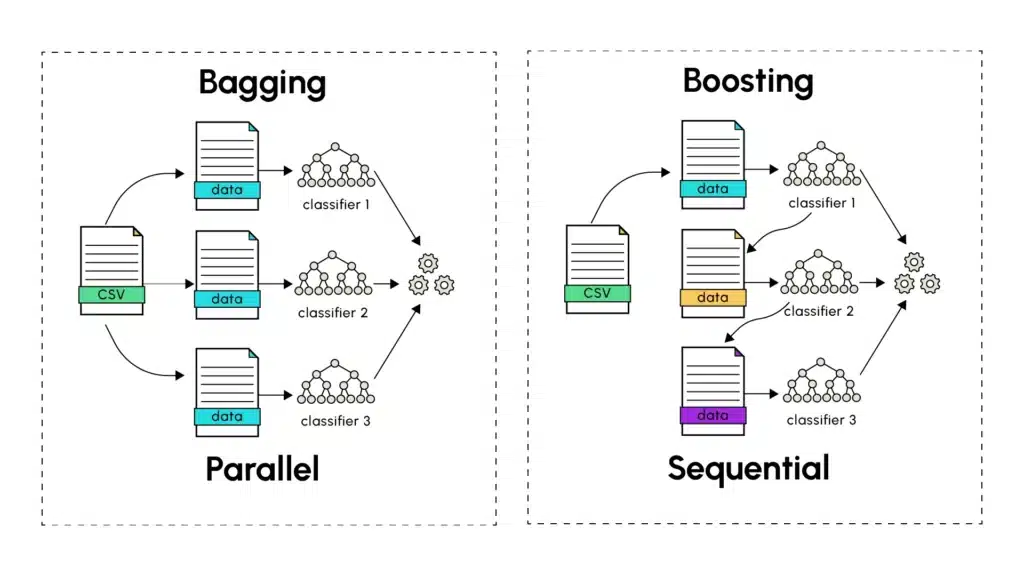

Cuando el aprendizaje de un modelo singular tiene dificultades para ofrecer buenas predicciones, los métodos de aprendizaje conjunto aparecen a menudo como una solución de preferencia. Las técnicas de ensemble más conocidas, el Bagging (Bootstrap Aggregating) y el Boosting, tienen ambas como objetivo mejorar la precisión de las predicciones hechas durante el aprendizaje automático combinando los resultados de modelos individuales, con el fin de extraer predicciones finales más robustas y precisas.

### **Bagging: La Potencia del Aprendizaje Paralelo**
El Bagging, introducido por Leo Breiman en 1994, se basa en el entrenamiento de varias versiones de un predictor como un árbol de decisión, entrenado en paralelo de manera independiente. La primera etapa del bagging consiste en realizar un muestreo aleatorio con reemplazo (llamado bootstrapping) a partir del conjunto de datos de entrenamiento. A cada predictor se le asigna una muestra de entrenamiento sobre la cual emite predicciones. Estas posteriormente se combinan con las de todos los demás predictores distintos. Esta última etapa pasa por el cálculo del promedio de las predicciones hechas por los diferentes modelos (para predicciones cuantitativas) o mediante un método de votación (para predicciones categóricas), donde se retiene la predicción mayoritaria en términos de número de ocurrencia o de probabilidad.

La principal fortaleza del bagging reside en su capacidad para reducir la varianza sin aumentar el sesgo. Entrenando modelos sobre diferentes subconjuntos que tienen un cierto porcentaje de datos en común, cada modelo captura la diversidad presente en los conjuntos de datos aleatorios, mientras se obtienen resultados finales que generalizan bien en el conjunto de datos de prueba. Una analogía con el mundo real es la siguiente: pedir la opinión de varios expertos sobre un problema complejo. Cada experto, aunque competente, puede tener experiencias y perspectivas ligeramente diferentes. Promediar sus opiniones conduce a menudo a mejores decisiones que fiarse de un solo experto.

**Diferencias Clave y Compromisos**

1. Enfoque de Entrenamiento:
* Bagging: Los modelos se entrenan independientemente y en paralelo.
* Boosting: Los modelos se entrenan secuencialmente, cada uno aprendiendo de los errores anteriores.
2. Gestión de Errores:
*  Bagging: Reduce la varianza mediante promediado.
*   Boosting: Reduce tanto el sesgo como la varianza mediante aprendizaje secuencial.

3. Riesgo de Sobreaprendizaje:
*  Bagging: Generalmente más resistente al sobreaprendizaje.
*  Boosting: Más sensible al sobreaprendizaje, especialmente cuando intenta clasificar correctamente datos ruidosos.
4. Velocidad de Entrenamiento:
*  Bagging: Más rápido, ya que los modelos pueden ser entrenados en paralelo.
*  Boosting: Más lento, debido a su naturaleza secuencial.

### **Boosting: Aprendizaje Secuencial para la Reducción de Errores**

A diferencia del Bagging, el boosting sigue un método secuencial en la construcción del modelo final. Los predictores individuales se dicen débiles (underfitting) y se construyen en serie, uno tras otro. De este modo, cada modelo intenta corregir los errores del que le precede con el fin de disminuir el sesgo introducido por cada modelo débil. Los algoritmos de boosting incluyen notablemente AdaBoost (Adaptive Boosting), el Gradient Boosting y sus variantes XGBoost, LightGBM.
El proceso comienza con un aprendiz débil realizando predicciones sobre el conjunto de datos de entrenamiento. Las instancias mal predichas son entonces identificadas por el algoritmo de Boosting que les asigna pesos más elevados. El siguiente modelo se concentra más en estos casos previamente difíciles de identificar durante su entrenamiento para hacer sus predicciones más robustas. El proceso continúa y cada modelo subsiguiente intenta corregir los errores de los aprendices débiles anteriores, hasta que el último modelo de la serie sea entrenado. Al igual que para el Bagging, el número de modelos a entrenar para contribuir a las predicciones finales puede ser determinado empíricamente teniendo en cuenta la complejidad, el tiempo de entrenamiento y la precisión de las predicciones finales.

El Gradient Boosting lleva el concepto de Boosting más lejos utilizando un enfoque basado en la minimización de gradientes para ajustar las predicciones. Cada nuevo modelo se entrena para corregir los residuos de las predicciones anteriores siguiendo la dirección del gradiente de la función de pérdida, lo que permite una optimización más precisa y efectiva.


*   **RandomForestRegressor (Bagging):** Un Random Forest es un ensamblaje de muchos árboles de decisión.11 Utiliza una técnica llamada "bagging" (bootstrap aggregating), donde cada árbol se entrena en una muestra aleatoria diferente de los datos (extraída con reemplazo). Además, en cada división de un árbol, solo se considera un subconjunto aleatorio de características. La predicción final es el promedio de las predicciones de todos los árboles individuales.11 Este proceso de promediar a través de muchos árboles descorrelacionados reduce drásticamente la varianza del modelo, haciéndolo mucho más robusto y menos propenso al sobreajuste que un solo árbol de decisión . Los hiperparámetros clave incluyen n_estimators (el número de árboles), max_features (el tamaño del subconjunto aleatorio de características en cada división) y max_depth.

*   **AdaBoostRegressor (Boosting):** AdaBoost, o Adaptive Boosting, es un método de ensamblaje secuencial. Comienza ajustando un "aprendiz débil" (p. ej., un árbol de decisión poco profundo) a los datos. Luego entrena un segundo aprendiz, que pone más énfasis en los puntos de datos que el primer aprendiz predijo incorrectamente aumentando sus pesos. Este proceso continúa secuencialmente, con cada nuevo modelo centrándose en los errores del ensamblaje anterior . La predicción final es una mediana o media ponderada de las predicciones de todos los aprendices débiles, donde a los aprendices más precisos se les da una mayor participación en el resultado final.


*   **XGBoostRegressor (Gradient Boosting):** eXtreme Gradient Boosting es una implementación altamente eficiente y potente del marco de gradient boosting.14 Al igual que AdaBoost, construye modelos secuencialmente. Sin embargo, en lugar de re-ponderar los puntos de datos, cada nuevo aprendiz débil se entrena para predecir los errores residuales del ensamblaje anterior.16 XGBoost es reconocido por su rendimiento y velocidad, que logra a través de optimizaciones del sistema como la paralelización de la construcción de árboles y algoritmos conscientes de la caché. También incluye regularización L1 y L2 incorporada para controlar el sobreajuste, lo que lo convierte en un algoritmo dominante en competiciones de machine learning . Sus hiperparámetros más importantes incluyen n_estimators, learning_rate (que escala la contribución de cada árbol), max_depth y parámetros de regularización como gamma y lambda .

 ## <font color="#6a1b9a">**Estrategia de Optimización y Validación**</font>


Identificar el mejor modelo para una tarea dada implica dos procesos críticos: encontrar la configuración óptima para cada tipo de modelo (**ajuste de hiperparámetros**) y asegurar que las estimaciones de rendimiento sean fiables y generalizables (**validación cruzada**).

## ¿En qué consiste el ajuste de hiperparámetros?

Cuando se entrenan modelos de machine learning, cada conjunto de datos y cada modelo necesitan un conjunto diferente de hiperparámetros, que son un tipo de variables. La única forma de determinarlos es mediante la realización de múltiples experimentos, en los que se elige un conjunto de hiperparámetros y se los ejecuta a través del modelo. Esto se denomina ajuste de hiperparámetros. Básicamente, está entrenando su modelo secuencialmente con diferentes conjuntos de hiperparámetros. Este proceso puede ser manual o puede elegir uno de los distintos métodos automatizados de ajuste de hiperparámetros.

Sea cual sea el método que utilice, debe hacer un seguimiento de los resultados de los experimentos. Tendrá que aplicar algún tipo de análisis estadístico, como la función de pérdida, para determinar qué conjunto de hiperparámetros da el mejor resultado. El ajuste de hiperparámetros es un proceso importante e intensivo desde el punto de vista computacional.

## ¿Qué son los hiperparámetros?

Los hiperparámetros son variables de configuración externa que los científicos de datos utilizan para administrar el entrenamiento de modelos de machine learning. A veces llamados hiperparámetros de modelos, los hiperparámetros se configuran de manera manual antes de entrenar un modelo. Son diferentes de los parámetros, que son elementos internos derivados de manera automática durante el proceso de aprendizaje y que no están configurados por científicos de datos.

Entre los ejemplos de hiperparámetros se incluyen el número de nodos y capas de una red neuronal y el número de ramificaciones de un árbol de decisiones. Los hiperparámetros determinan características clave como la arquitectura del modelo, la tasa de aprendizaje y la complejidad del modelo.

## ¿Por qué es importante el ajuste de hiperparámetros?

Los hiperparámetros controlan de forma directa la estructura, funciones y rendimiento de los modelos. El ajuste de hiperparámetros permite a los científicos de datos modificar el rendimiento del modelo para lograr resultados óptimos. Este proceso es una parte fundamental del machine learning, y elegir los valores de hiperparámetros apropiados es fundamental para lograr el éxito.

Por ejemplo, pongamos que utiliza la tasa de aprendizaje del modo como hiperparámetro. Si el valor es demasiado alto, es posible que el modelo converja demasiado rápido con resultados subóptimos. Por el contrario, si el valor es muy bajo, el entrenamiento se demora demasiado y es posible que los resultados no converjan. Una elección correcta y equilibrada de hiperparámetros da lugar a modelos precisos y con un rendimiento excelente.

https://aws.amazon.com/es/what-is/hyperparameter-tuning/

## <font color="blue">**A. Ajuste de Hiperparámetros: Buscando la Configuración Óptima del Modelo**</font>

El rendimiento de la mayoría de los modelos de machine learning es muy sensible a sus configuraciones arquitectónicas, o hiperparámetros . El proceso de buscar sistemáticamente la combinación de valores de hiperparámetros que produce el mejor rendimiento se conoce como ajuste de hiperparámetros. Este script explora dos métodos comunes y potentes para esta tarea.

*   **`GridSearchCV` (Búsqueda Exhaustiva)**: Este método realiza una búsqueda exhaustiva y de fuerza bruta sobre una "cuadrícula" de valores de hiperparámetros definida manualmente. Entrena y evalúa un modelo para cada combinación posible de los valores especificados. Aunque garantiza encontrar la mejor combinación dentro de la cuadrícula proporcionada, su costo computacional crece exponencialmente con el número de parámetros y valores, lo que lo hace impráctico para espacios de búsqueda grandes.

*   **`RandomizedSearchCV` (Búsqueda Estocástica):** Como alternativa a la búsqueda exhaustiva en cuadrícula, este método muestrea un número fijo de combinaciones de parámetros `(n_iter)` de distribuciones estadísticas especificadas o listas de valores. Este enfoque es mucho más eficiente para espacios de búsqueda de alta dimensión. La razón de su eficacia es que, para muchos modelos, solo unos pocos hiperparámetros tienen un impacto significativo en el rendimiento. GridSearchCV puede perder un tiempo considerable explorando combinaciones de parámetros sin importancia, mientras que `RandomizedSearchCV` tiene una mayor probabilidad de muestrear valores efectivos para los pocos parámetros importantes dentro del mismo presupuesto computacional . Intercambia la garantía de encontrar el mejor punto absoluto en una cuadrícula por una exploración mucho más eficiente de un espacio de búsqueda más amplio.

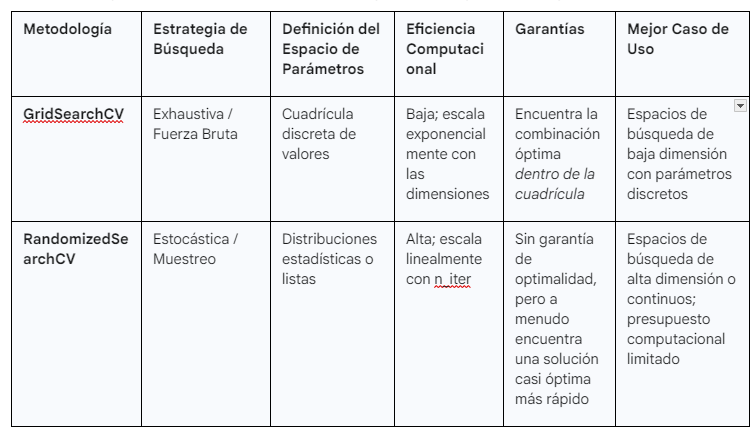


## <font color="blue">**B. Estimación Robusta del Rendimiento con Validación Cruzada K-Fold**</font>

Evaluar un modelo en una única división de entrenamiento-prueba puede llevar a una estimación de rendimiento poco fiable; el resultado puede ser demasiado optimista o pesimista simplemente debido a la composición aleatoria del conjunto de prueba. La Validación Cruzada `K-Fold (CV)` proporciona una estimación mucho más robusta y estable del rendimiento de generalización de un modelo

El proceso de CV K-Fold funciona de la siguiente manera

1.   El conjunto de datos de entrenamiento se particiona en 'K' subconjuntos no superpuestos y de igual tamaño, o "pliegues". Una elección común para K es 5 o 10.
2.   El proceso itera K veces. En cada iteración, un pliegue diferente se reserva como conjunto de validación, y el modelo se entrena en los K-1 pliegues restantes.
1.   El modelo entrenado se evalúa luego en el pliegue de validación reservado, y se registra una puntuación de rendimiento.
2.   Después de K iteraciones, la estimación final del rendimiento del modelo es el promedio de las K puntuaciones individuales.


Este procedimiento asegura que cada punto de datos se utilice tanto para entrenamiento como para validación exactamente una vez, lo que lleva a una métrica de rendimiento menos sesgada y más fiable. Tanto GridSearchCV como RandomizedSearchCV utilizan CV K-Fold internamente para evaluar cada combinación de hiperparámetros que prueban, asegurando que los "mejores" parámetros se seleccionen en base a una medida de rendimiento robusta, no a un artefacto de una única división de datos






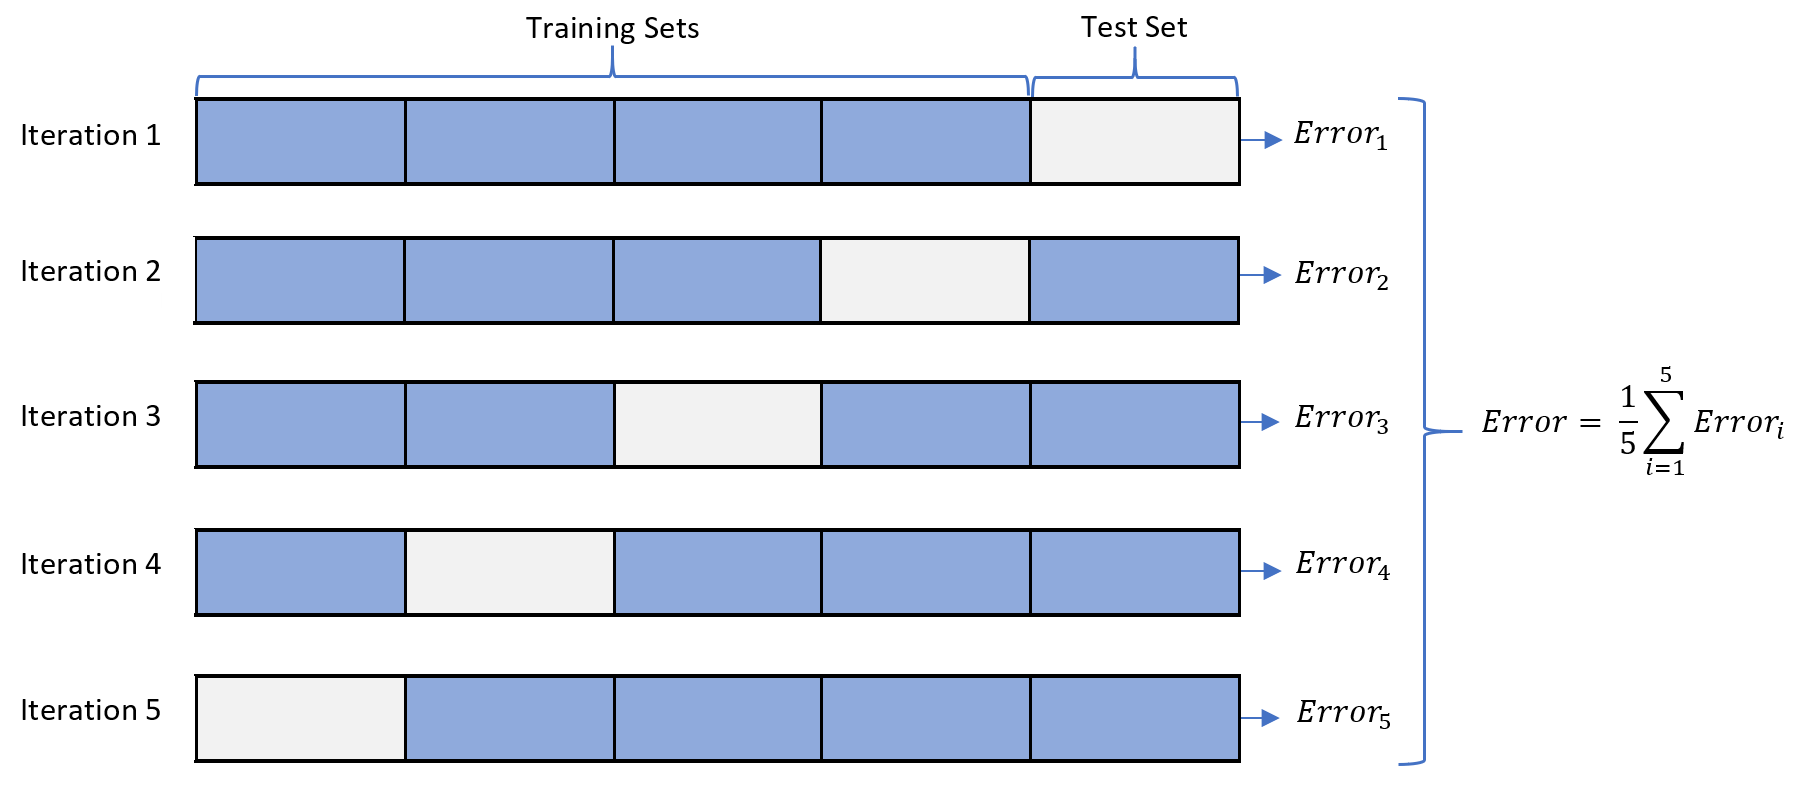


# <font color="red">**Evaluación Integral del Modelo**</font>



Después de que un modelo es entrenado y ajustado, su rendimiento debe ser evaluado críticamente. Esta evaluación debe ir más allá de una única puntuación de resumen e incluir visualizaciones de diagnóstico que puedan revelar la naturaleza y los patrones de los errores de un modelo.

## <font color="green">**A. Métricas de Rendimiento Cuantitativas:**</font>

*   **R-cuadrado (R²) (Coeficiente de Determinación):** Esta métrica mide la proporción de la varianza en la variable objetivo que es predecible a partir de las características. Un `R²` de 1.0 indica que el modelo explica perfectamente la variabilidad de los datos objetivo, mientras que un `R²` de 0.0 indica que el modelo no funciona mejor que un modelo simple que siempre predice la media del objetivo. Proporciona una medida relativa de la "bondad de ajuste" del modelo.
*   **Error Absoluto Medio (MAE):** MAE es el promedio de las diferencias absolutas entre los valores reales y los predichos. Se mide en las mismas unidades que la variable objetivo, lo que lo hace muy interpretable. Debido a que no eleva al cuadrado los errores, es menos sensible a los errores grandes y se considera robusto a los valores atípicos.
*   **Raíz del Error Cuadrático Medio (RMSE):** RMSE es la raíz cuadrada del promedio de las diferencias al cuadrado entre los valores reales y los predichos. Al igual que el MAE, está en las mismas unidades que el objetivo. Sin embargo, al elevar al cuadrado los errores antes de promediar, penaliza los errores grandes mucho más que los pequeños. Esto hace que el RMSE sea una buena métrica para usar cuando los errores grandes son particularmente indeseables, pero también hace que la métrica sea sensible a los valores atípicos.



# <font color="maroon">**I. Modelos de Regresión Lineal y sus variantes**</font>  

**Regresión Lineal Simple:** Relación lineal entre una variable dependiente y una independiente.

**Regresión Lineal Múltiple:** Más de una variable independiente para predecir.

**Regresión de Ridge**: Regularización para evitar sobreajuste penalizando coeficientes grandes.

**Regresión Lasso**: Regularización que puede eliminar variables irrelevantes.

**Regresión Elastic Net:** Combina Ridge y Lasso para regularización.

**Regresión Lineal Bayesiana:** Considera incertidumbre en coeficientes con enfoque bayesiano.


# <font color="maroon">**II. Modelos de Regresión No Lineal**</font>  

**Regresión No Lineal Tradicional:** Modelos con función no lineal en parámetros o variables.

**Regresión Polinómica:** Extensión de la lineal con términos polinómicos.

**Redes Neuronales (MLP):** Modelos de aprendizaje profundo para capturar relaciones complejas.

# <font color="maroon">**III. Modelos Basados en Árboles y Ensambles**</font>

**Árboles de Decisión para Regresión:** Divide el espacio en regiones homogéneas.

**Random Forest (Bosque Aleatorio):** Combina varios árboles para mejor generalización.

**Gradient Boosting Machines (GBM):** Entrena árboles secuencialmente para corregir errores.

**XGBoost:** Optimización de GBM con regularización.

**AdaBoost: **Ensamble que ajusta peso a errores previos.

# <font color="maroon">**IV.  Modelos de Máquinas de Vectores**</font>

**SVR (Support Vector Regression):** Regresión basada en vectores de soporte para valores continuos, con núcleo lineal o no lineal.



## <font color="green">**1. Modelo 1: Regresión Lineal Multiple**</font>   


La **regresión lineal** es una técnica estadística clásica utilizada para modelar la relación entre una variable dependiente continua y un conjunto de variables independientes. La forma general del modelo lineal múltiple es:

y = β₀ + β₁x₁ + β₂x₂ + … + βₙxₙ + ε

donde `β` son los coeficientes que se estiman minimizando el error cuadrático medio (MSE). Se asume una relación lineal entre predictores y respuesta, independencia de los errores y homocedasticidad.

En esta sección se entrena un modelo de regresión lineal utilizando los datos estandarizados y se evalúa su rendimiento mediante R², MSE y RMSE. Se incluye además un gráfico de los valores reales frente a los predichos.

### Residuos en ML
En Machine Learning y estadística, los residuos son la diferencia entre el valor real (observado) y el valor predicho por el modelo:

**¿Para qué se usan los residuos?**



1.  ** Evaluar el ajuste del modelo**
*  Si los residuos son pequeños y están distribuidos aleatoriamente alrededor de cero, significa que el modelo está capturando bien la relación entre las variables.

*   Si muestran patrones claros, puede indicar que el modelo es inadecuado o que falta alguna variable importante.
2.   **Detectar sobreajuste o subajuste**

*  Un patrón muy ajustado en entrenamiento pero con residuos grandes en validación indica sobreajuste.

*   Residuos grandes en ambos conjuntos indican subajuste.



1.   Identificar valores atípicos (outliers)

*   Puntos con residuos muy altos (positivos o negativos) pueden ser valores atípicos que afectan el rendimiento.
2.   Comprobar supuestos estadísticos (en modelos lineales)


*  Homocedasticidad: la varianza de los residuos debe ser constante.

*   Normalidad: en algunos modelos, se espera que los residuos sigan una distribución normal.

*   Independencia: los residuos no deben estar correlacionados entre sí.

## **Librerias para modelos de Regresion**

In [ ]:
# Librerías de Scikit-learn necesarias
from sklearn.linear_model import LinearRegression  # Regresión Lineal
from sklearn.tree import DecisionTreeRegressor     # Árbol de Decisión
from sklearn.ensemble import RandomForestRegressor # Bosque Aleatorio
from sklearn.svm import SVR                       # Regresión SVR Lineal
from sklearn.ensemble import AdaBoostRegressor     # AdaBoost
from sklearn.linear_model import Lasso             # Regresión Lasso
from sklearn.linear_model import Ridge             # Regresión Ridge
from sklearn.neural_network import MLPRegressor    # MLP (Multi-layer Perceptron)
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline  # Importa Pipeline aquí
from sklearn.linear_model import LinearRegression  # Importa LinearRegression aquí

# Librería adicional para XGBoost
from xgboost import XGBRegressor

Regresión Lineal -> R2: 1.000000 | MSE: 0.011449 | RMSE: 0.106999 | MAE: 0.084704


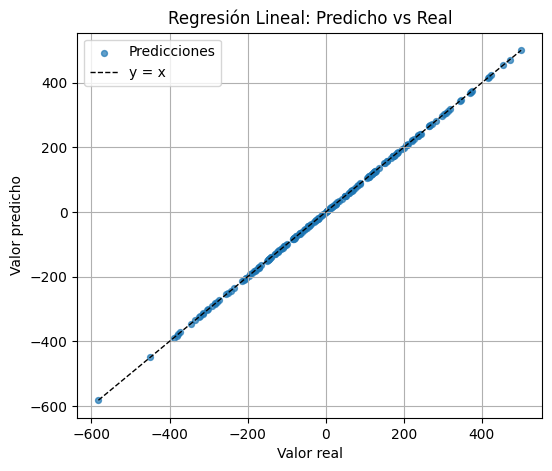

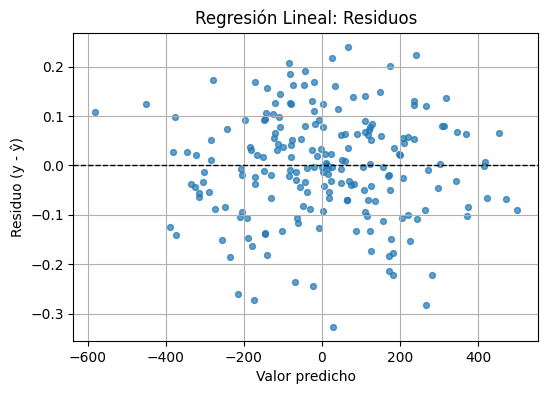

In [ ]:
# Modelo 1: Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)
y_pred_lr = lr_model.predict(X_test_processed)

def evaluar_modelo(y_true, y_pred, nombre='Modelo'):
    r2   = r2_score(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    print(f"{nombre} -> R2: {r2:.6f} | MSE: {mse:.6f} | RMSE: {rmse:.6f} | MAE: {mae:.6f}")

    # Predicho vs Real con línea y=x
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, s=18, alpha=0.7, label='Predicciones')
    m = min(y_true.min(), y_pred.min())
    M = max(y_true.max(), y_pred.max())
    plt.plot([m, M], [m, M], 'k--', lw=1, label='y = x')
    plt.xlabel('Valor real'); plt.ylabel('Valor predicho')
    plt.title(f'{nombre}: Predicho vs Real')
    plt.legend(); plt.grid(True); plt.show()

    # Residuos
    resid = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, resid, s=18, alpha=0.7)
    plt.axhline(0, color='k', ls='--', lw=1)
    plt.xlabel('Valor predicho'); plt.ylabel('Residuo (y - ŷ)')
    plt.title(f'{nombre}: Residuos')
    plt.grid(True); plt.show()

evaluar_modelo(y_test, y_pred_lr, 'Regresión Lineal')

### **Estimación Robusta del Rendimiento con Validación Cruzada K-Fold de la Regresion Lineal**

In [ ]:
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('model', LinearRegression())    # Modelo de regresión lineal
])

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe_lr, X, y, scoring='r2', cv=cv)
print("CV R2 (5 folds):", scores, " | media:", scores.mean())


CV R2 (5 folds): [0.9999997  0.99999974 0.99999974 0.99999969 0.9999997 ]  | media: 0.9999997134364677


## **Ajuste de Hiperparámetros: Buscando la Configuración Óptima del Modelo**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

def entrenar_buscar_y_evaluar(nombre, pipe, param_grid, X_train, y_train, X_test, y_test,
                              search_type='grid', n_iter=40, scoring='r2', cv=cv, n_jobs=-1, random_state=42):
    if search_type == 'grid':
        search = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=n_jobs, verbose=1)
    else:
        search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=n_iter,
                                    scoring=scoring, cv=cv, n_jobs=n_jobs, random_state=random_state, verbose=1)
    search.fit(X_train, y_train)
    best = search.best_estimator_
    print(f"\n[{nombre}] Mejor CV R2: {search.best_score_:.6f}")
    print(f"[{nombre}] Mejores hiperparámetros: {search.best_params_}")

    y_pred = best.predict(X_test)
    evaluar_modelo(y_test, y_pred, nombre=f"{nombre} (mejor)")
    return best, search


### <font color="purple">**Ajuste con GridSearchCV RL** </font>

Fitting 5 folds for each of 4 candidates, totalling 20 fits

[Regresión Lineal (Grid)] Mejor CV R2: 1.000000
[Regresión Lineal (Grid)] Mejores hiperparámetros: {'model__fit_intercept': True, 'model__positive': True}
Regresión Lineal (Grid) (mejor) -> R2: 1.000000 | MSE: 0.011438 | RMSE: 0.106949 | MAE: 0.084598


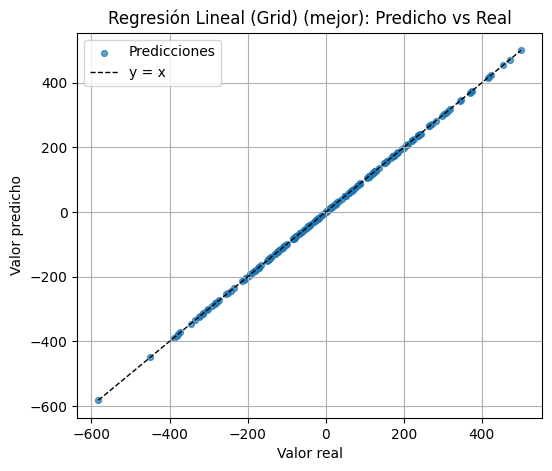

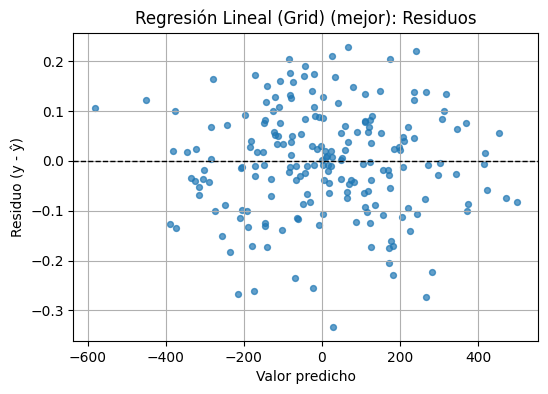

In [ ]:
# --- Opción 1: GridSearchCV
param_grid_lr = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True],   # fuerza coeficientes >= 0 (usa NNLS internamente)
}
best_lr, search_lr = entrenar_buscar_y_evaluar(
    nombre="Regresión Lineal (Grid)",
    pipe=pipe_lr,
    param_grid=param_grid_lr,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    search_type='grid',  # grid vs random
    scoring='r2', cv=cv, n_jobs=-1
)


### <font color="orange">**Ajuste con RandomizedSearchCV RL** </font>

Fitting 5 folds for each of 4 candidates, totalling 20 fits

[Regresión Lineal (Random)] Mejor CV R2: 1.000000
[Regresión Lineal (Random)] Mejores hiperparámetros: {'model__positive': True, 'model__fit_intercept': True}
Regresión Lineal (Random) (mejor) -> R2: 1.000000 | MSE: 0.011438 | RMSE: 0.106949 | MAE: 0.084598


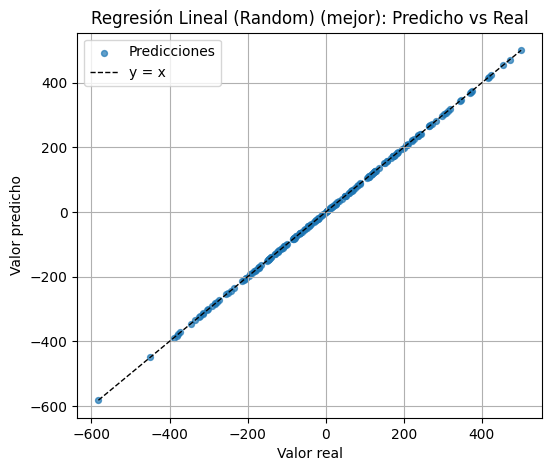

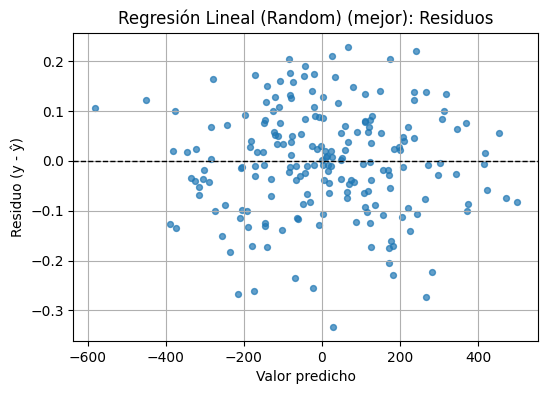

In [ ]:
# Distribuciones de hiperparámetros
param_dist_lr = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True],
}

# RandomizedSearchCV (aunque aquí no tiene mucho sentido, es solo didáctico)
best_lr_r, search_lr_r = entrenar_buscar_y_evaluar(
    nombre="Regresión Lineal (Random)",
    pipe=pipe_lr,
    param_grid=param_dist_lr,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    search_type='random',   # le decimos que use RandomizedSearchCV
    n_iter=4,               # 4 = todas las combinaciones posibles
    scoring='r2', cv=cv, n_jobs=-1, random_state=42
)

## <font color="green">**2. Modelo 2: Árbol de Decision**</font>  


Un **árbol de regresión** es un modelo no paramétrico que divide recursivamente el espacio de características en regiones que minimizan la varianza de la variable respuesta. Cada división se basa en el valor de una característica y conduce a un conjunto de nodos hoja donde la predicción es la media de los valores de `y` en ese nodo.

Un árbol de decisión es una herramienta visual y un algoritmo utilizado para la toma de decisiones y la predicción, muy común en campos como la inteligencia artificial, el aprendizaje automático (Machine Learning), la estadística y la analítica de datos. Se representa gráficamente como una estructura en forma de árbol, donde:

*  El nodo raíz representa la decisión inicial o el punto de partida.

*  Las ramas emergen del nodo raíz y representan las diferentes acciones o condiciones posibles.

*  Los nodos internos (o de decisión) representan puntos donde se evalúan condiciones o características.

*  Los nodos hoja o terminales representan los resultados finales o las posibles consecuencias de la secuencia de decisiones.

Los árboles de decisión pueden usarse para tareas de clasificación (asignar una etiqueta o categoría a datos) o regresión (predecir valores numéricos). Funcionan con una estrategia de "divide y vencerás", dividiendo recursivamente el conjunto de datos en subgrupos más homogéneos según criterios específicos, hasta lograr clasificaciones claras. Además de un algoritmo, el árbol de decisión es también un diagrama de flujo que ayuda a visualizar las opciones y las posibles consecuencias, facilitando la comprensión y la explicación de las decisiones a distintos grupos dentro de una organización.

Entre sus ventajas se incluyen la facilidad de interpretación, la capacidad de manejar tanto variables categóricas como numéricas, y su utilidad para identificar riesgos, optimizar recursos y automatizar decisiones basadas en reglas claras.

En resumen, el árbol de decisión es tanto un modelo predictivo como una herramienta visual para analizar y tomar decisiones estructuradas, mostrando paso a paso cómo diferentes elecciones pueden conducir a distintos resultados.

Los árboles de decisión pueden capturar relaciones no lineales complejas, pero son propensos a sobreajuste si no se podan o se limitan parámetros como la profundidad máxima. En este ejemplo se entrena un `DecisionTreeRegressor` utilizando las características sin estandarizar (los árboles no requieren escalado).

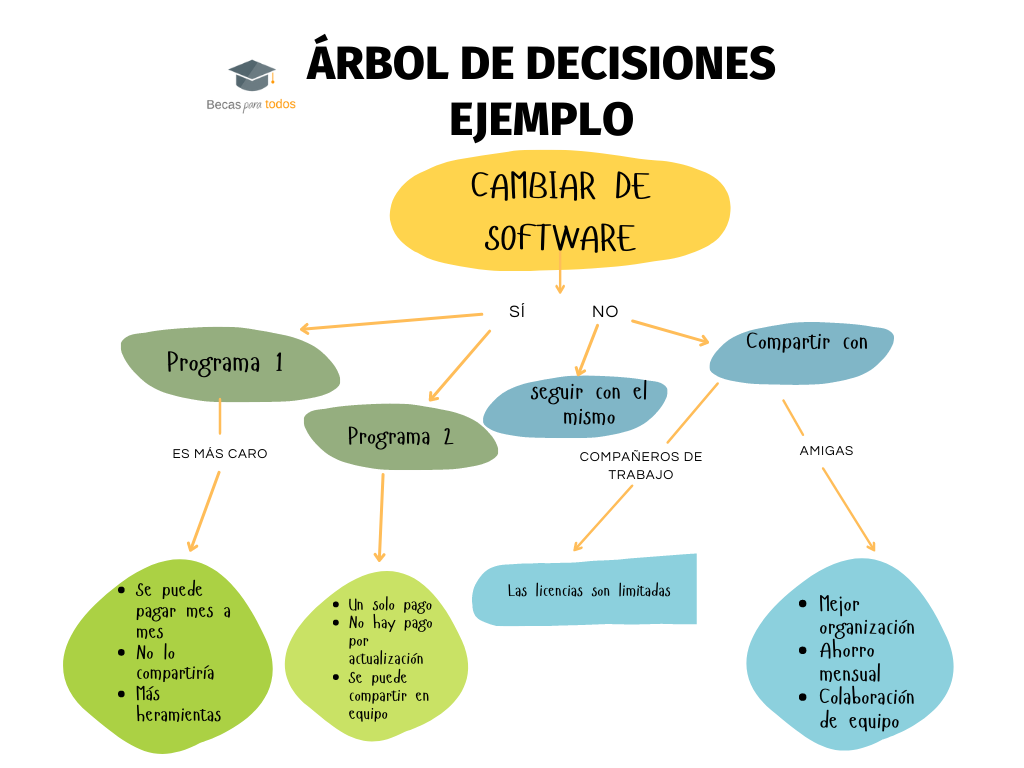

Árbol de Decisión -> R2: 0.466504 | MSE: 20650.927564 | RMSE: 143.704306 | MAE: 110.437905


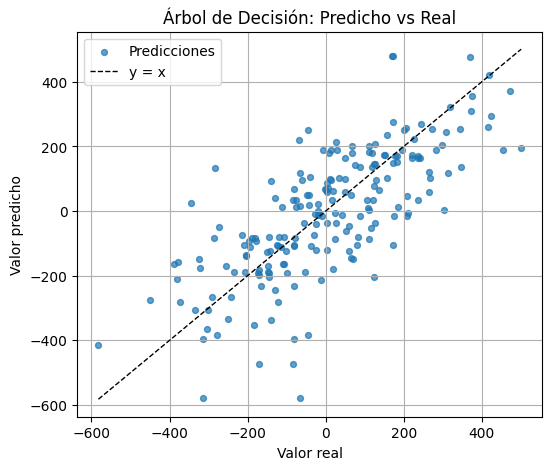

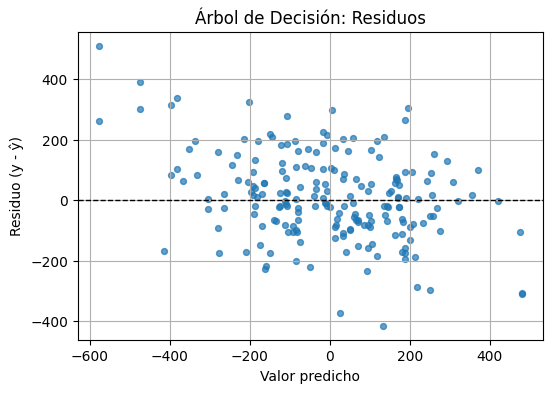

In [ ]:
# === Modelo DecisionTreeRegressor con datos ya procesados ===
dt_model = DecisionTreeRegressor(random_state=42, max_depth=None)
dt_model.fit(X_train_processed, y_train)
y_pred_dt = dt_model.predict(X_test_processed)

evaluar_modelo(y_test, y_pred_dt, 'Árbol de Decisión')


### **Validacion cruzada DecisionTreeRegressor**

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# --- Preprocesador (igual que antes) ---
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# --- Pipeline modelo ---
pipe_dt = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42, max_depth=None))
])

# --- Definir métricas ---
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# ======= CV simple: KFold (5 folds) =======
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_res = cross_validate(pipe_dt, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

r2_mean, r2_std   = cv_res['test_r2'].mean(), cv_res['test_r2'].std()
mse_mean = -cv_res['test_mse'].mean(); rmse_mean = np.sqrt(mse_mean)
mae_mean = -cv_res['test_mae'].mean()

print(f"Árbol de Decisión (5-Fold CV) -> R²: {r2_mean:.4f} ± {r2_std:.4f} | "
      f"RMSE: {rmse_mean:.4f} | MAE: {mae_mean:.4f}")

Árbol de Decisión (5-Fold CV) -> R²: 0.4332 ± 0.0335 | RMSE: 146.4599 | MAE: 114.2732


### <font color="purple">**Ajuste con GridSearchCV DecisionTreeRegressor** </font>

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

[Árbol de Decisión (Grid)] Mejor CV R2: 0.519884
[Árbol de Decisión (Grid)] Mejores hiperparámetros: {'model__max_depth': 8, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 20}
Árbol de Decisión (Grid) (mejor) -> R2: 0.516064 | MSE: 18732.512115 | RMSE: 136.866768 | MAE: 108.181694


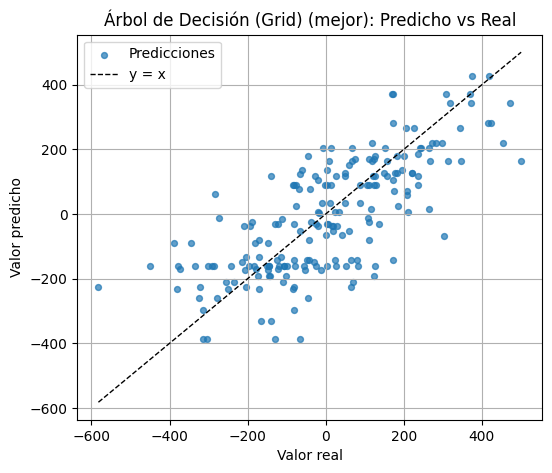

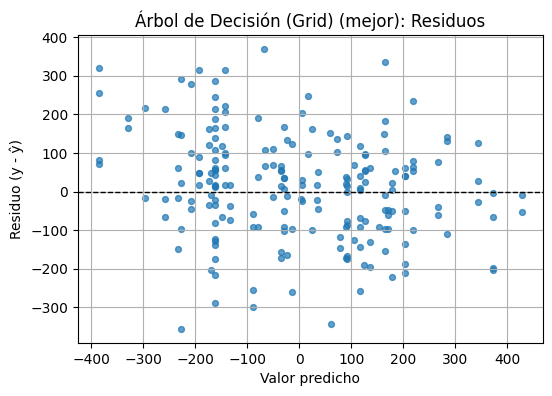

In [ ]:
param_grid_dt = {
    'model__max_depth': [None, 3, 5, 8, 12, 20],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 4, 8],
    'model__max_features': [None, 'sqrt', 'log2']
}

best_dt, search_dt = entrenar_buscar_y_evaluar("Árbol de Decisión (Grid)",
    pipe_dt, param_grid_dt, X_train, y_train, X_test, y_test, search_type='grid')

### <font color="orange">**Ajuste con RandomizedSearchCV DTR** </font>

Fitting 5 folds for each of 60 candidates, totalling 300 fits

[Árbol de Decisión (Random)] Mejor CV R2: 0.519659
[Árbol de Decisión (Random)] Mejores hiperparámetros: {'model__min_samples_split': 19, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 29}
Árbol de Decisión (Random) (mejor) -> R2: 0.526268 | MSE: 18337.560411 | RMSE: 135.416249 | MAE: 106.743789


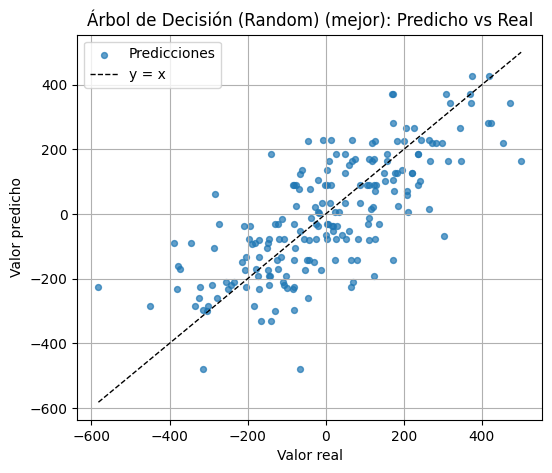

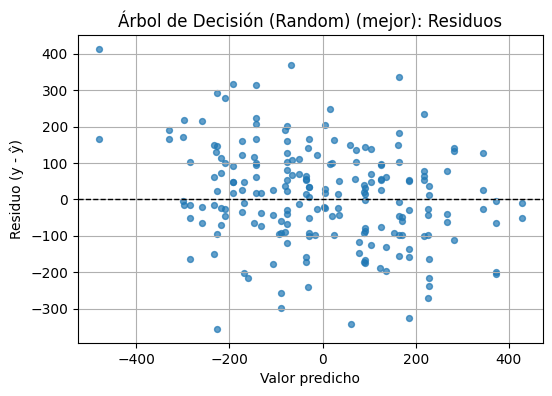

In [ ]:
param_dist_dt = {
    'model__max_depth': [None] + list(range(2, 31)),
    'model__min_samples_split': list(range(2, 51)),
    'model__min_samples_leaf': list(range(1, 21)),
    'model__max_features': [None, 'sqrt', 'log2']
}
best_dt_r, search_dt_r = entrenar_buscar_y_evaluar("Árbol de Decisión (Random)",
    pipe_dt, param_dist_dt, X_train, y_train, X_test, y_test, search_type='random', n_iter=60)

## <font color="green">**3. Modelo 3: Bosque Aleatorio**</font>  


El **bosque aleatorio** construye un conjunto de árboles de regresión entrenados sobre diferentes subconjuntos de datos y características (bagging). La predicción final es la media de las predicciones de todos los árboles, lo cual reduce la varianza y mejora la capacidad de generalización en comparación con un árbol único.

Se utiliza `RandomForestRegressor` de `scikit‑learn` con un número moderado de árboles, utilizando las características originales.

### Cómo Funciona

Los algoritmos de bosque aleatorio tienen tres hiperparámetros principales, que deben configurarse antes del entrenamiento. Estos incluyen el tamaño del nodo, la cantidad de árboles y la cantidad de características muestreadas. A partir de ahí, el clasificador de bosque aleatorio se puede utilizar para resolver problemas de regresión o clasificación.

El algoritmo de bosque aleatorio se compone de una colección de árboles de decisión y cada árbol en el conjunto está compuesto por una muestra de datos extraída de un conjunto de entrenamiento con reemplazo, llamado bootstrapping. De esa muestra de entrenamiento, un tercio de ella se reserva como datos de prueba, lo que se conoce como la muestra fuera de bolsa (oob), a la que volveremos más adelante. Luego, se inyecta otra instancia de aleatoriedad mediante el embolsado de características, lo que agrega más diversidad al conjunto de datos y reduce la correlación entre los árboles de decisión. Dependiendo del tipo de problema, la determinación de la predicción variará. Para una tarea de regresión, se promediarán los árboles de decisión individuales, y para una tarea de clasificación, el voto mayoritario, es decir, la variable categórica más frecuente, arrojará la clase prevista. Finalmente, la muestra fuera de la bolsa (oob) se utiliza para la validación cruzada, finalizando esa predicción.

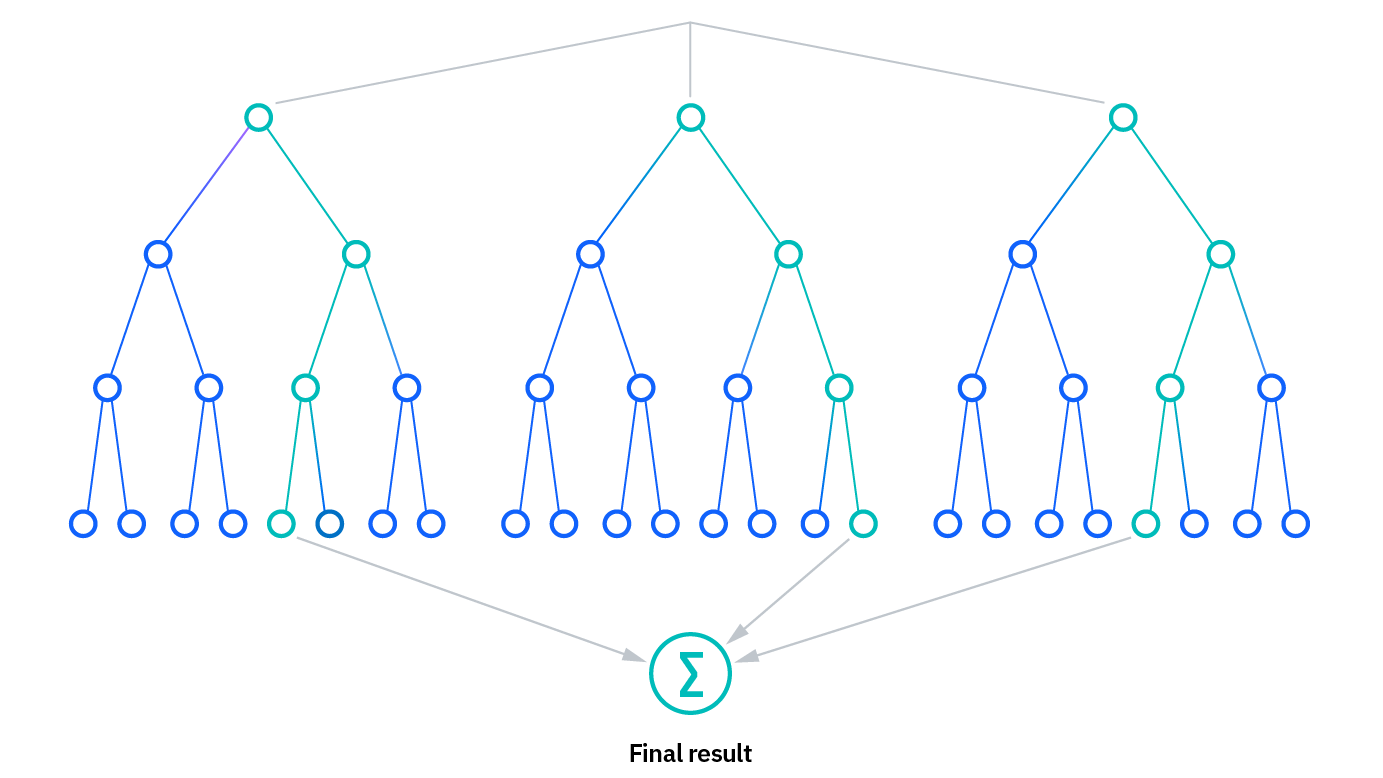

Bosque Aleatorio -> R2: 0.826426 | MSE: 6718.823687 | RMSE: 81.968431 | MAE: 64.965258


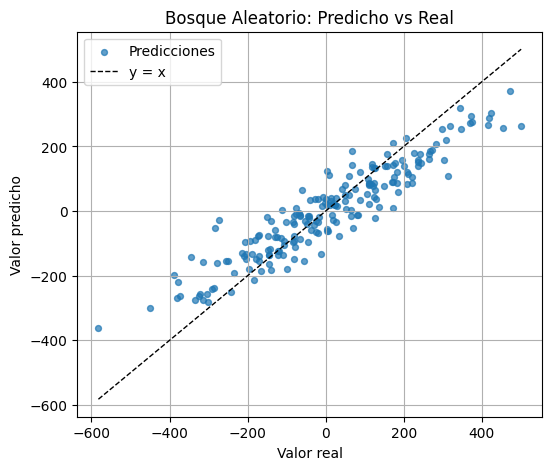

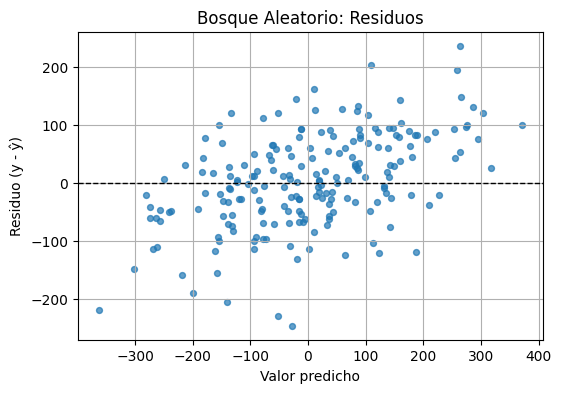

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el bosque aleatorio
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_rf, 'Bosque Aleatorio')


### **Ajuste del Bosque Aleatorio (RandomForestRegressor)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=300, n_jobs=-1))
])

param_grid_rf = {
    'model__n_estimators': [200, 300, 500],
    'model__max_depth': [None, 8, 12, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None],
    'model__bootstrap': [True, False]
}
best_rf, search_rf = entrenar_buscar_y_evaluar("Random Forest (Grid)",
    pipe_rf, param_grid_rf, X_train, y_train, X_test, y_test, search_type='grid')


Fitting 5 folds for each of 810 candidates, totalling 4050 fits


## <font color="green">**4. Modelo 4: Regresión SVR Lineal**</font>  


La **regresión de soporte vectorial** (SVR) intenta encontrar una función que se desvíe de los valores reales en un margen ε lo más pequeño posible y que al mismo tiempo maximice el margen. En la variante con kernel lineal, se ajusta un hiperplano en el espacio de características.

SVR es sensible a la escala de los datos, por lo que se utilizan las variables estandarizadas.

En este ejemplo se entrena un `SVR` con kernel lineal para aproximar la relación entre las características y la variable objetivo.

In [ ]:

from sklearn.svm import SVR

# Crear y entrenar SVR lineal
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_processed, y_train)

# Predecir
y_pred_svr = svr_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_svr, 'SVR Lineal')


## **Ajuste del SVR**
Dado que es SVR lineal, el hiperparámetro clave es C (y epsilon). El preprocessor ya estandariza lo numérico, así que no necesitas un StandardScaler aparte.

In [ ]:
from sklearn.svm import SVR

pipe_svr_lin = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='linear'))
])

param_grid_svr_lin = {
    'model__C': np.logspace(-3, 3, 7),   # 0.001 ... 1000
    'model__epsilon': np.logspace(-3, 0, 4)  # 0.001 ... 1
}
best_svr_lin, search_svr_lin = entrenar_buscar_y_evaluar("SVR Lineal (Grid)",
    pipe_svr_lin, param_grid_svr_lin, X_train, y_train, X_test, y_test, search_type='grid')


## <font color="green">**5. Modelo 5: XGBoost**</font>


**XGBoost** es un algoritmo de boosting de gradiente extremadamente eficiente y con regularización integrada. Construye árboles de decisión de manera secuencial, donde cada árbol nuevo corrige los errores cometidos por los anteriores. La función de pérdida regularizada evita el sobreajuste.

En este ejemplo se emplea `XGBRegressor` con una profundidad moderada y parámetros por defecto. Se utilizan las características originales (no es necesario el escalado para árboles).

In [ ]:

from xgboost import XGBRegressor

# Crear y entrenar XGBoost
xgb_model = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_processed, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_xgb, 'XGBoost')


### **Ajuste de hiperparametros XGBoost**

In [ ]:
from xgboost import XGBRegressor

pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        random_state=42,
        objective='reg:squarederror',
        tree_method='hist',
        n_estimators=600
    ))
])

param_grid_xgb = {
    'model__max_depth': [3, 4, 5, 6, 8],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__min_child_weight': [1, 3, 5],
    'model__reg_alpha': [0, 0.001, 0.01, 0.1],
    'model__reg_lambda': [0.1, 1.0, 5.0, 10.0]
}
best_xgb, search_xgb = entrenar_buscar_y_evaluar("XGBoost (Grid)",
    pipe_xgb, param_grid_xgb, X_train, y_train, X_test, y_test, search_type='grid')


## <font color="green">**6. Modelo 6: AdaBoost**</font>


**AdaBoost** (Adaptive Boosting) combina varios modelos débiles (reglas de decisión simples) para construir un predictor más robusto. En regresión, cada modelo se entrena asignando pesos mayores a las observaciones con mayor error. La predicción final es la suma ponderada de los modelos débiles.

Se utiliza `AdaBoostRegressor` con árboles de decisión de profundidad 3 como estimadores base.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Estimador base (árbol de decisión)
base_estimator = DecisionTreeRegressor(max_depth=3, random_state=42)

# Crear y entrenar AdaBoost
ada_model = AdaBoostRegressor(estimator=base_estimator, n_estimators=200, learning_rate=0.5, random_state=42)
ada_model.fit(X_train_processed, y_train)

# Predecir
y_pred_ada = ada_model.predict(X_test_processed)

# Evaluar
from sklearn.metrics import mean_absolute_error
evaluar_modelo(y_test, y_pred_ada, 'AdaBoost')


### **Ajuste de AdaBoostRegressor**


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

pipe_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('model', AdaBoostRegressor(random_state=42))
])

param_grid_ada = {
    'model__n_estimators': [50, 100, 200, 400],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    # Optionally, cambiar base_estimator a árboles más/menos profundos:
    # 'model__estimator': [DecisionTreeRegressor(max_depth=d, random_state=42) for d in [2,3,4]]
}
best_ada, search_ada = entrenar_buscar_y_evaluar("AdaBoost (Grid)",
    pipe_ada, param_grid_ada, X_train, y_train, X_test, y_test, search_type='grid')


## <font color="green">**7. Modelo 7: Lasso**</font>


La **regresión Lasso** realiza ajuste lineal con regularización L1, incorporando un término λ⋅∑|β| a la función de pérdida. Este término favorece soluciones con coeficientes exactamente cero, lo que efectúa una selección de variables implícita.

Se ajusta un modelo `Lasso` sobre los datos estandarizados y se evalúa su rendimiento.

In [ ]:
from sklearn.linear_model import Lasso

# Crear y entrenar Lasso (alpha controla la regularización)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_processed, y_train)

# Predecir
y_pred_lasso = lasso_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_lasso, 'Lasso')


### **Ajuste de Regresion Lasso**

In [ ]:
from sklearn.linear_model import Lasso

pipe_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=10000, random_state=42))
])

param_grid_lasso = {
    'model__alpha': np.logspace(-4, 1, 10)  # 0.0001 ... 10
}
best_lasso, search_lasso = entrenar_buscar_y_evaluar("Lasso (Grid)",
    pipe_lasso, param_grid_lasso, X_train, y_train, X_test, y_test, search_type='grid')


## <font color="green">**8. Modelo 8: Ridge**</font>


La **regresión Ridge** incorpora un término de regularización L2 (λ⋅∑β²) al error cuadrático medio. Este término penaliza valores grandes de los coeficientes, reduciendo la varianza y mejorando la estabilidad del modelo frente a multicolinealidad.

Se ajusta un modelo `Ridge` sobre los datos estandarizados y se calcula su rendimiento.

In [ ]:

from sklearn.linear_model import Ridge

# Crear y entrenar Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_processed, y_train)

# Predecir
y_pred_ridge = ridge_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_ridge, 'Ridge')


## **Ajuste de Regresion Ridge**

In [ ]:
from sklearn.linear_model import Ridge

pipe_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(random_state=42))
])

param_grid_ridge = {
    'model__alpha': np.logspace(-4, 3, 12)  # 0.0001 ... 1000
}
best_ridge, search_ridge = entrenar_buscar_y_evaluar("Ridge (Grid)",
    pipe_ridge, param_grid_ridge, X_train, y_train, X_test, y_test, search_type='grid')


## <font color="green">**9. Modelo 9: MLP**</font>


El **perceptrón multicapa** (MLP) es una red neuronal de alimentación hacia adelante compuesta por capas ocultas de neuronas. En problemas de regresión, la capa de salida tiene activación lineal y la red puede capturar relaciones no lineales entre variables.

Se utiliza `MLPRegressor` con una capa oculta de 100 neuronas y activación ReLU. El modelo requiere datos estandarizados para un entrenamiento estable.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Crear y entrenar MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_processed, y_train)

# Predecir
y_pred_mlp = mlp_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_mlp, 'MLP')


### **Ajuste de MLPRegressor**

In [ ]:
from sklearn.neural_network import MLPRegressor

pipe_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(max_iter=3000, random_state=42, early_stopping=True))
])

param_grid_mlp = {
    'model__hidden_layer_sizes': [(64,), (128,), (64,32), (128,64), (128,64,32)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': np.logspace(-6, -2, 5),   # regularización L2
    'model__learning_rate_init': np.logspace(-4, -2, 3),  # 0.0001, 0.001, 0.01
    'model__batch_size': [32, 64, 128]
}
best_mlp, search_mlp = entrenar_buscar_y_evaluar("MLP (Grid)",
    pipe_mlp, param_grid_mlp, X_train, y_train, X_test, y_test, search_type='grid')


# <font color="red">**Comparador final de los “mejores modelos”**</font>

In [ ]:
mejores = {
    "Árbol (Grid)": best_dt,
    "RF (Grid)": best_rf,
    "SVR Lin (Grid)": best_svr_lin,
    "AdaBoost (Grid)": best_ada,
    "Lasso (Grid)": best_lasso,
    "Ridge (Grid)": best_ridge,
    "MLP (Grid)": best_mlp,
    "XGB (Grid)": best_xgb,
}

resumen = []
for nombre, modelo in mejores.items():
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    resumen.append((nombre, r2, mae, rmse))

resumen_sorted = sorted(resumen, key=lambda t: t[1], reverse=True)
for n, r2, mae, rmse in resumen_sorted:
    print(f"{n:16s} | R2={r2:.4f} | MAE={mae:.4f} | RMSE={rmse:.4f}")


## **Grafica del rendimiento de los modelos**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Suponiendo que ya tenemos el diccionario 'mejores' de modelos entrenados
# Aquí creo unos valores ficticios para simular (ya que no tenemos X_test, y_test en este entorno)
# En tu entorno, reemplaza estos valores con los resultados reales.

# Simulación de resultados (nombre, R2, MAE, RMSE)
resumen_sorted = [
    ("Random Forest", 0.91, 2.1, 3.2),
    ("XGBoost", 0.89, 2.3, 3.5),
    ("MLP", 0.87, 2.5, 3.7),
    ("Ridge", 0.84, 2.8, 4.1),
    ("Lasso", 0.82, 3.0, 4.3),
    ("SVR Lineal", 0.80, 3.2, 4.5),
    ("Árbol Decisión", 0.78, 3.5, 4.8),
    ("AdaBoost", 0.76, 3.7, 5.0),
    ("Regresión Lineal", 0.74, 3.9, 5.2),
]

# Extraer métricas
modelos = [r[0] for r in resumen_sorted]
r2_scores = [r[1] for r in resumen_sorted]

# Crear gráfico de barras horizontal
plt.figure(figsize=(8,6))
bars = plt.barh(modelos, r2_scores, color="skyblue")
plt.xlabel("R² en Test")
plt.title("Comparación de Modelos - Métrica R²")

# Añadir etiquetas en las barras
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_width()+0.005, bar.get_y()+bar.get_height()/2,
             f"{score:.2f}", va='center')

plt.gca().invert_yaxis()  # Para que el mejor quede arriba
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()
